In [412]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from itertools import combinations

In [413]:
# upload UCI_Credit_Card.csv to files
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#Explanatory Data Analysis

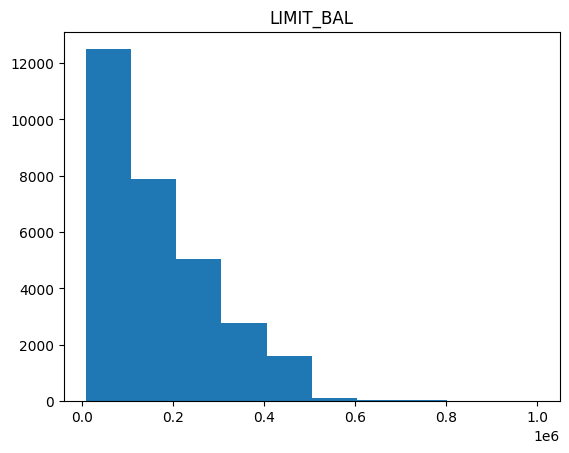

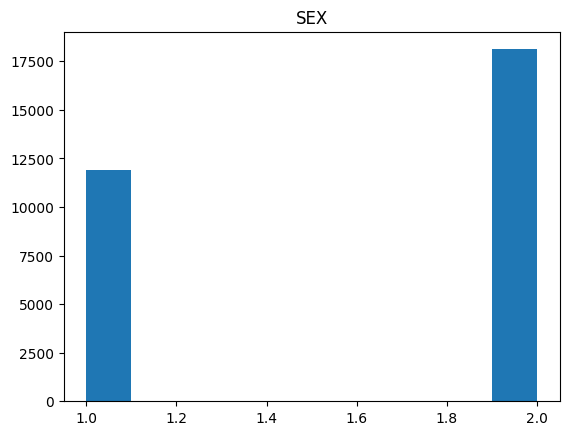

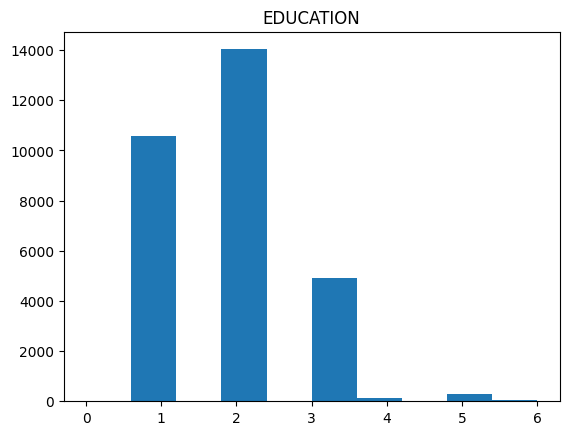

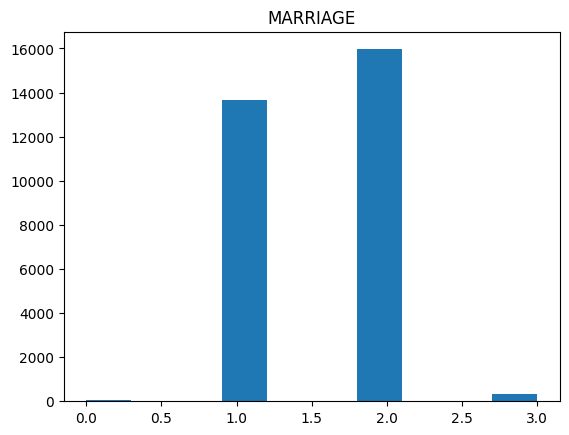

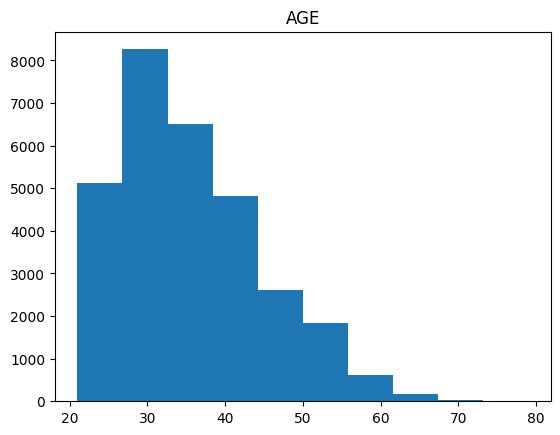

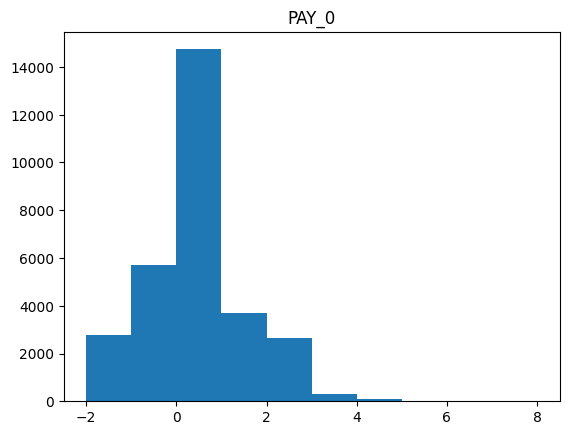

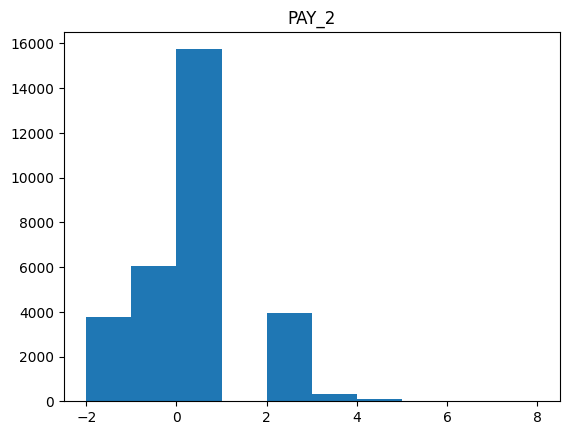

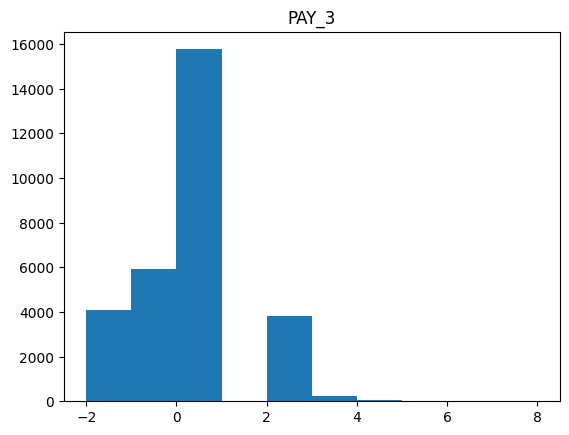

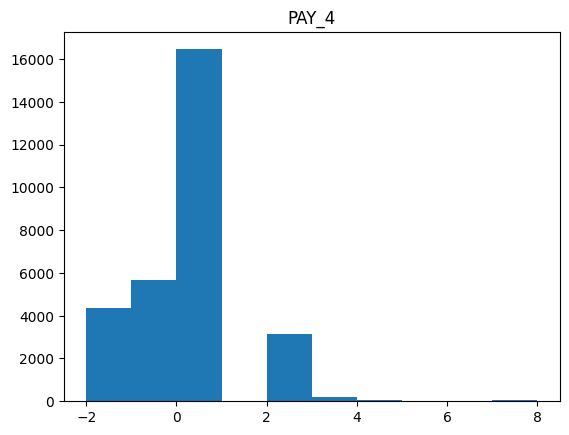

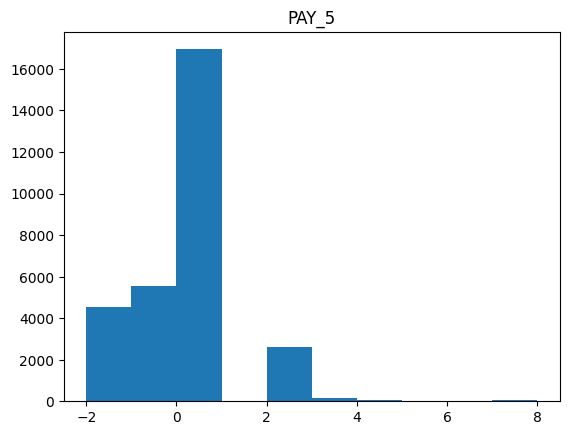

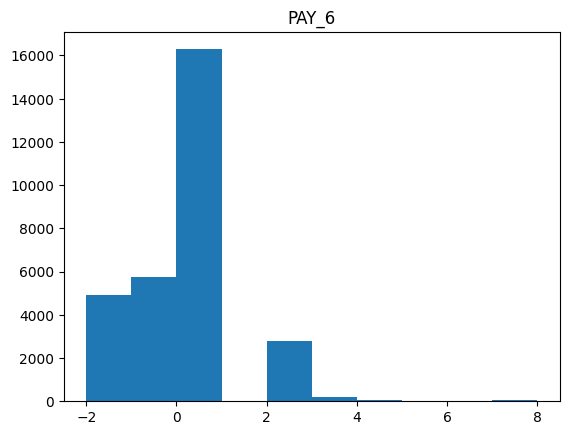

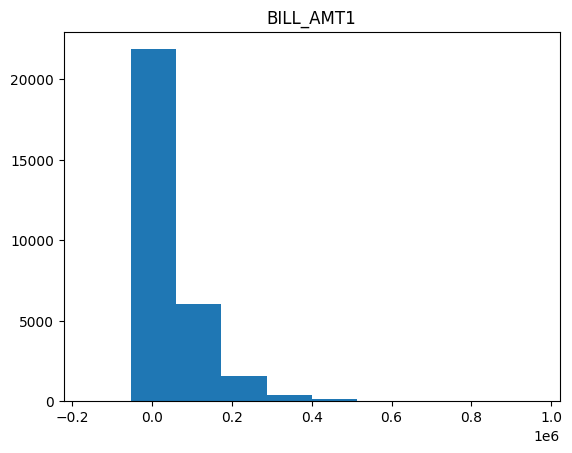

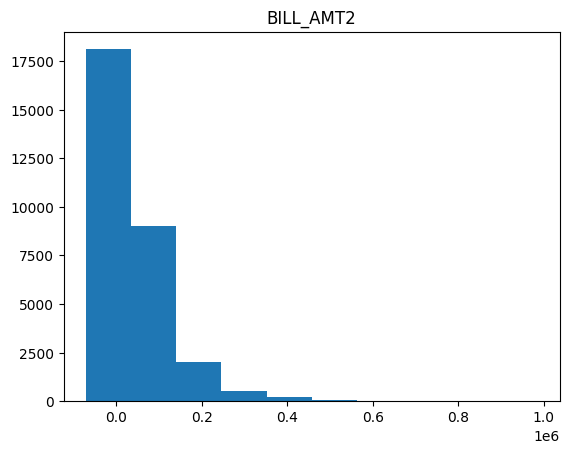

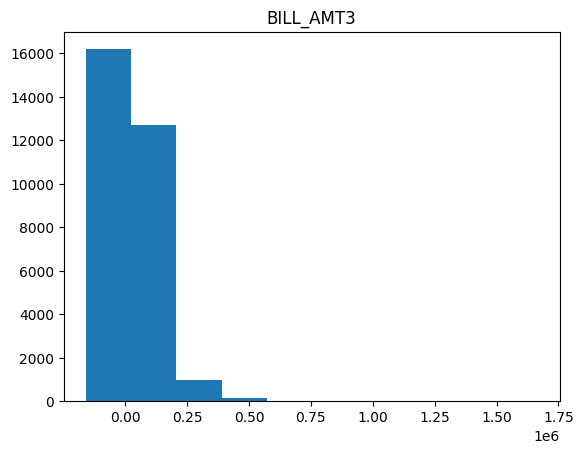

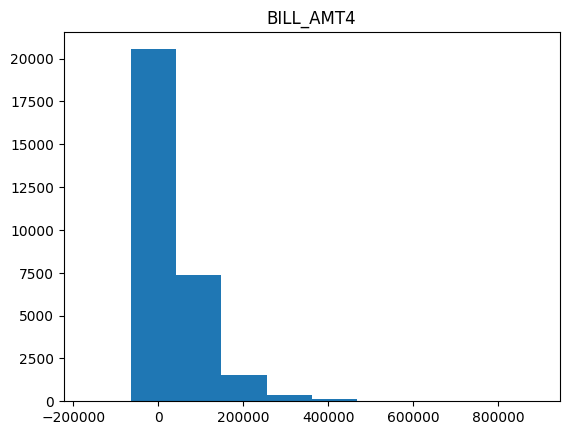

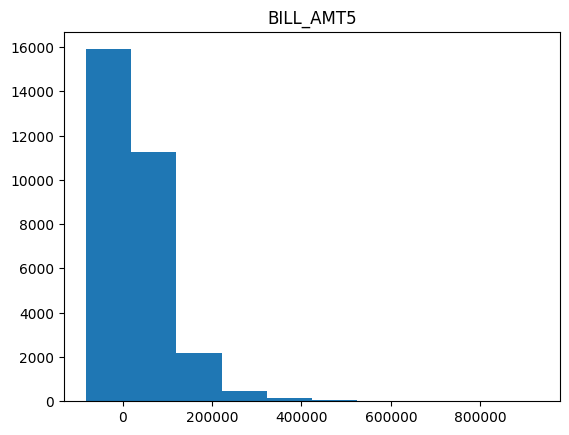

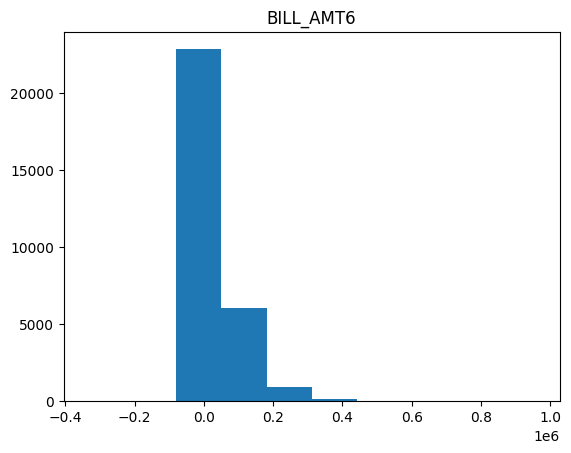

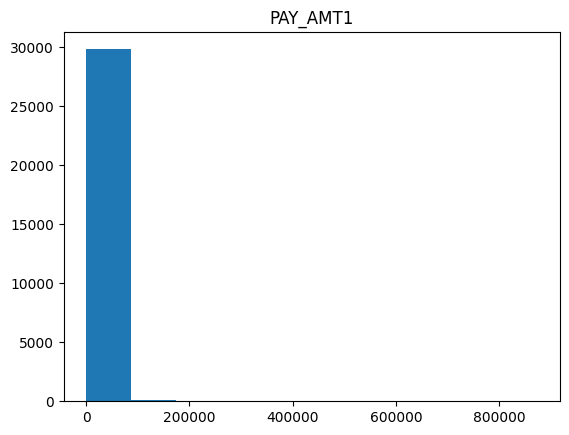

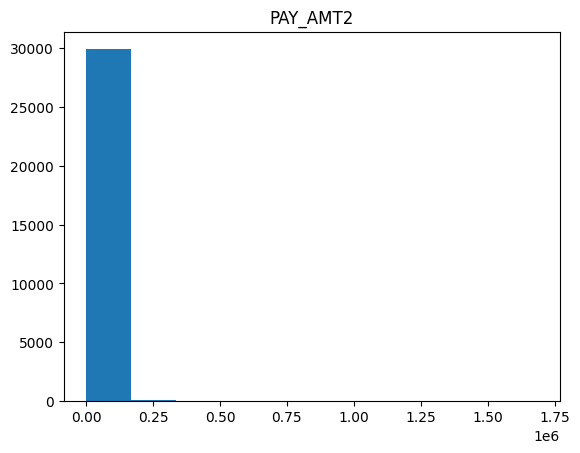

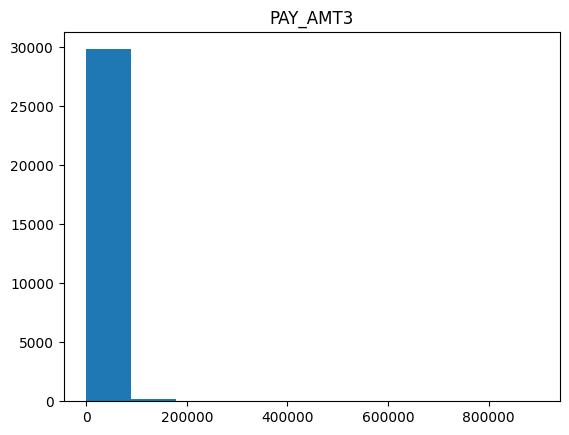

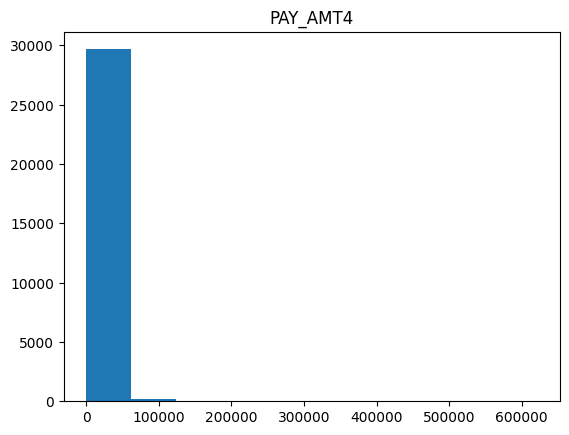

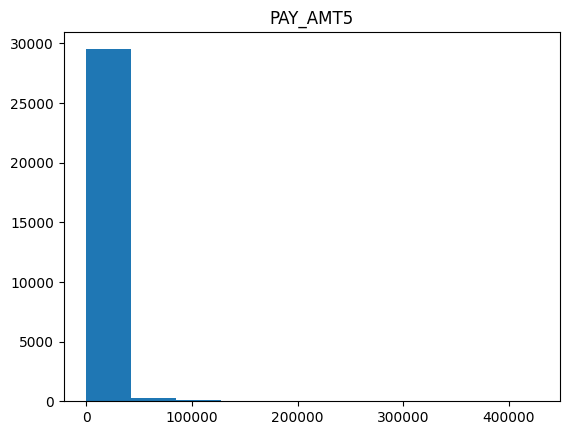

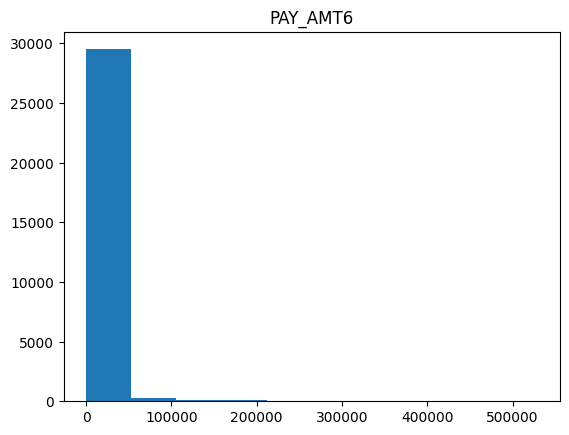

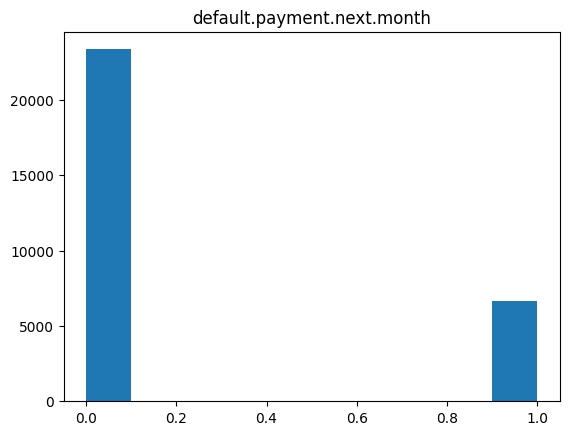

In [414]:
for attribute in data.columns:
  if (attribute == 'ID'):
    continue
  plt.figure()
  plt.hist(data[attribute])
  plt.title(attribute)
  plt.show()

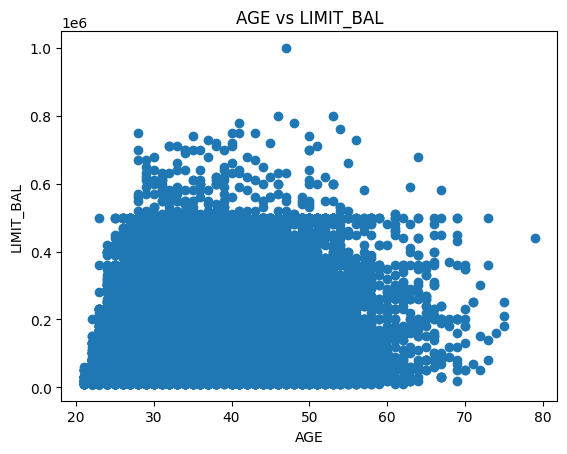

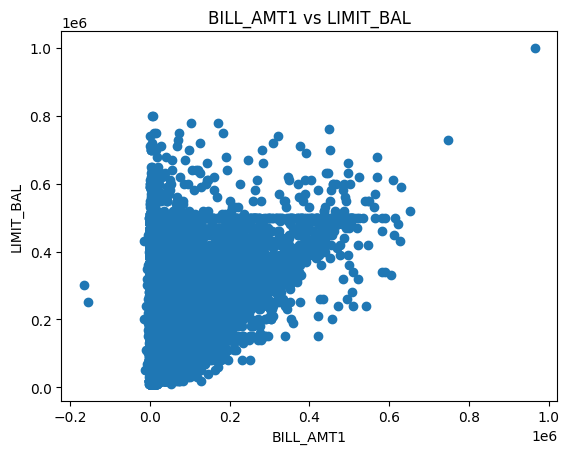

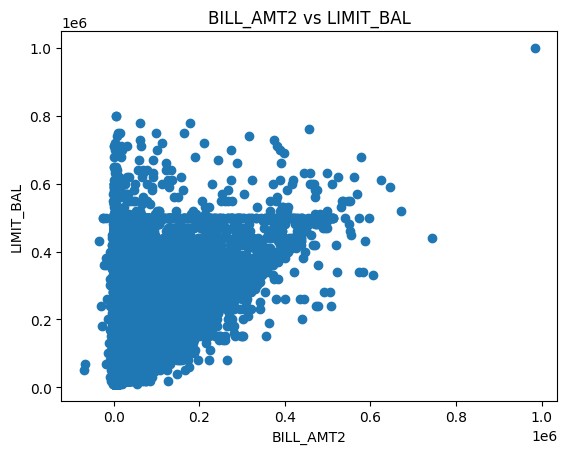

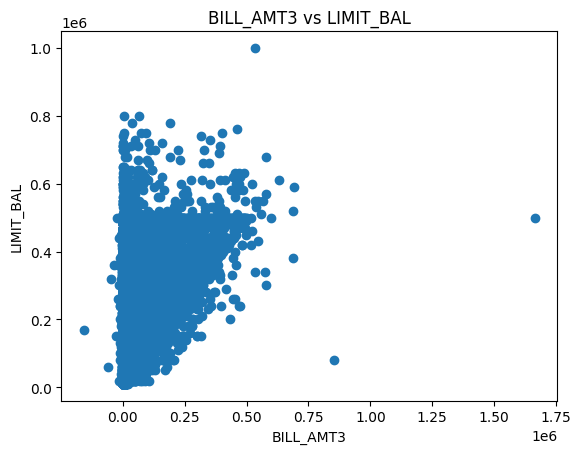

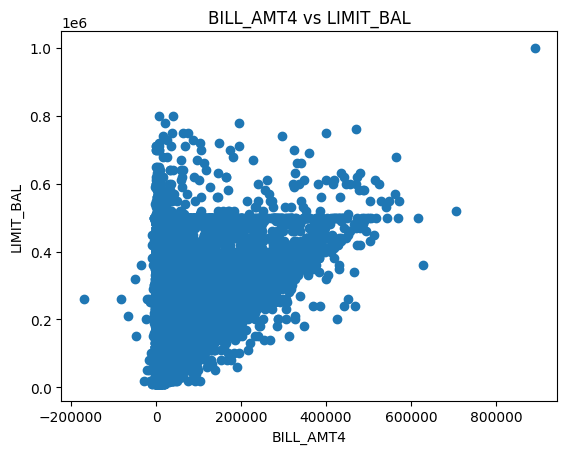

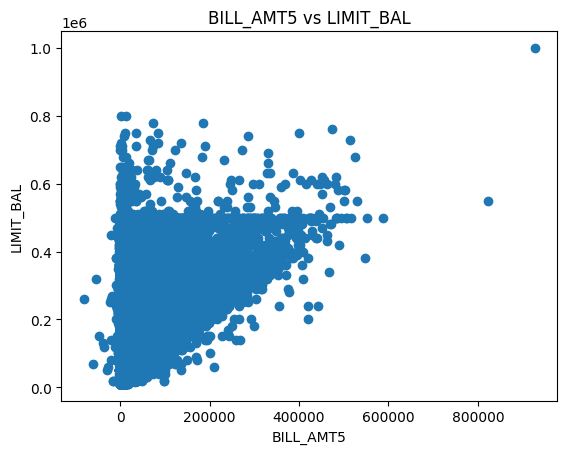

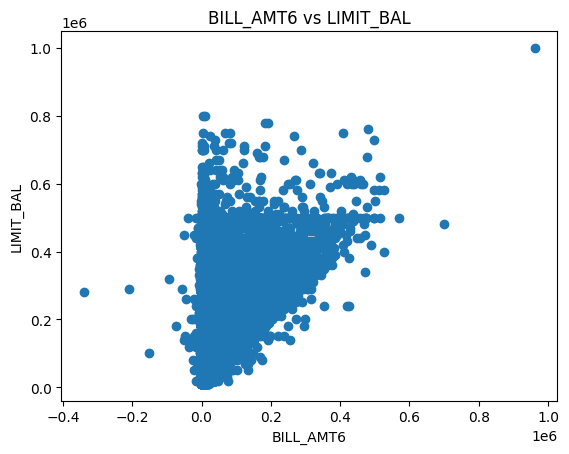

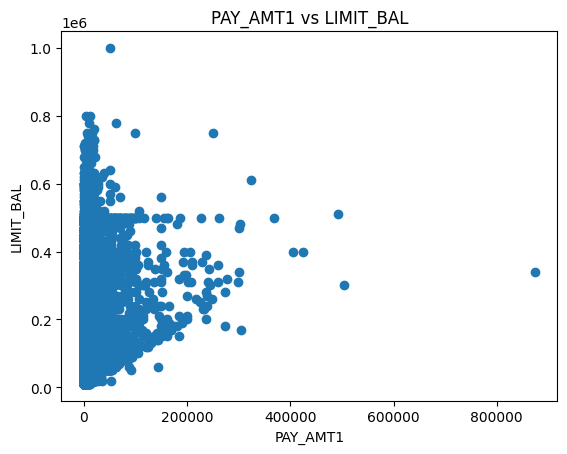

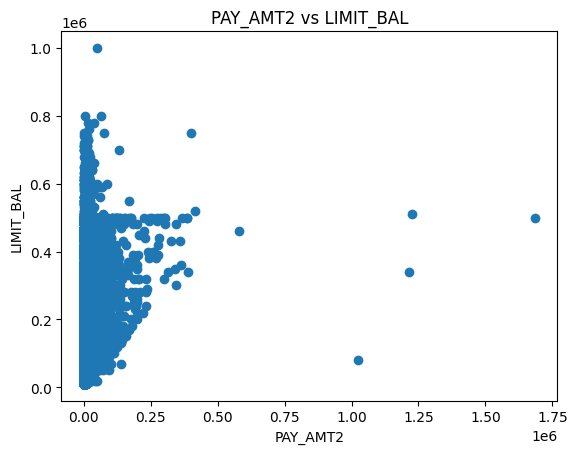

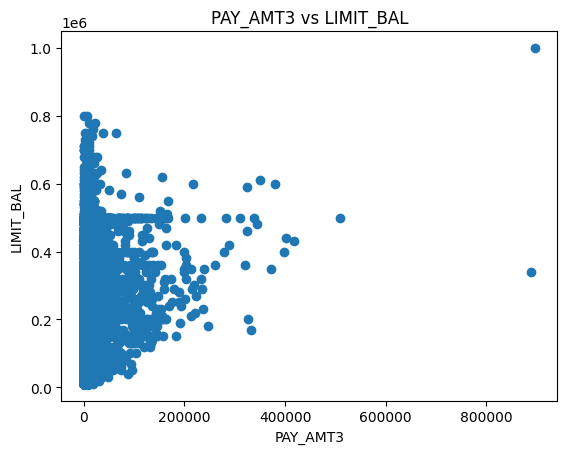

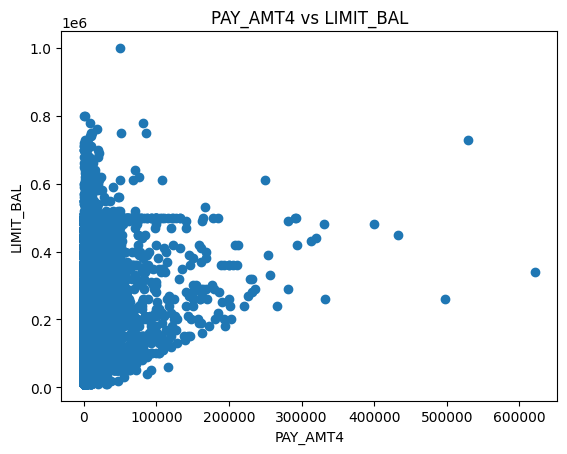

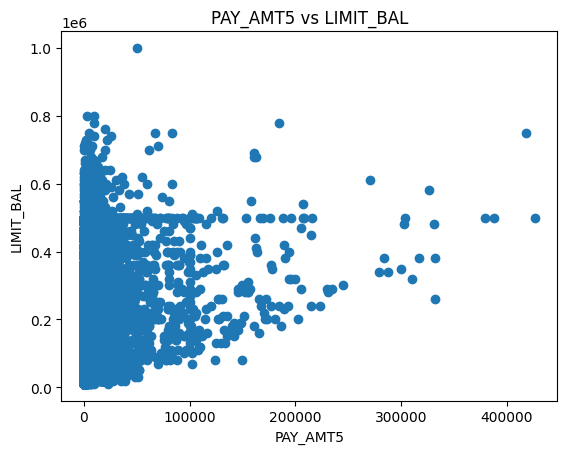

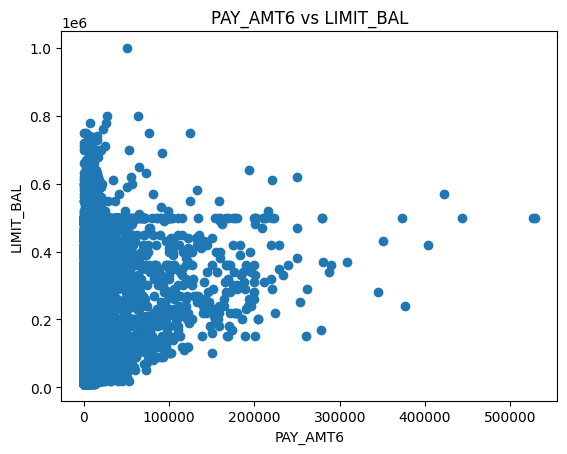

In [415]:
# skip the categorical/ordinal variables
plt.figure()
plt.scatter(data['AGE'], data['LIMIT_BAL'])
plt.title('AGE vs LIMIT_BAL')
plt.xlabel('AGE')
plt.ylabel('LIMIT_BAL')
plt.show()
for i in range(12, len(data.columns)-1):
  plt.figure()
  plt.scatter(data[data.columns[i]], data['LIMIT_BAL'])
  plt.title(data.columns[i] + ' vs LIMIT_BAL')
  plt.xlabel(data.columns[i])
  plt.ylabel('LIMIT_BAL')
  plt.show()

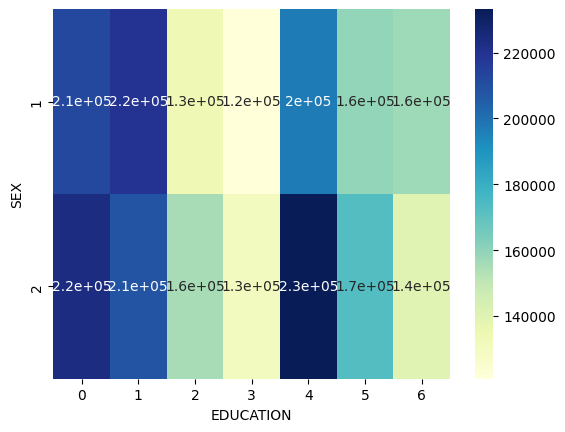

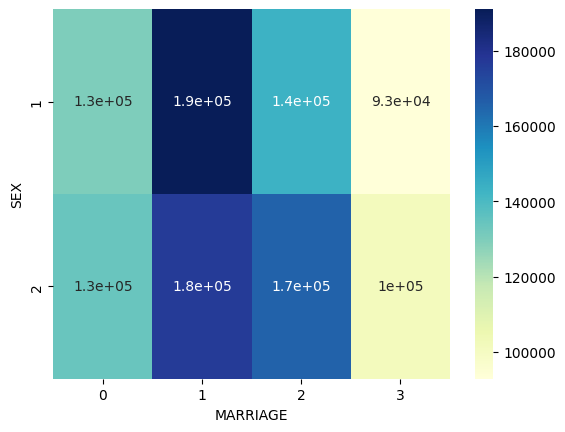

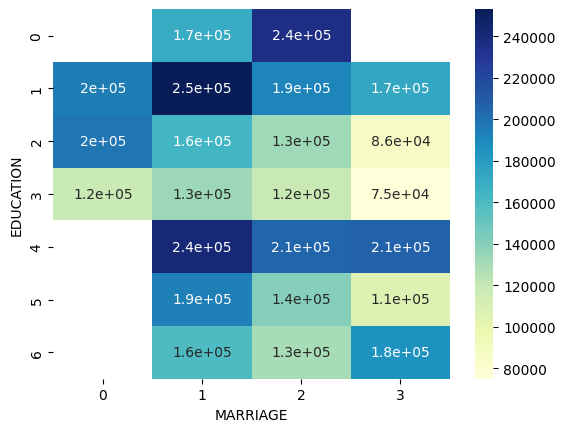

In [416]:
# use categorical/ordinal variables
for i in range(2, 5):
  for j in range(i+1, 5):
    heatmap_data = data.pivot_table(index=data.columns[i], columns=data.columns[j], values="LIMIT_BAL", aggfunc="mean")
    sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
    plt.show()


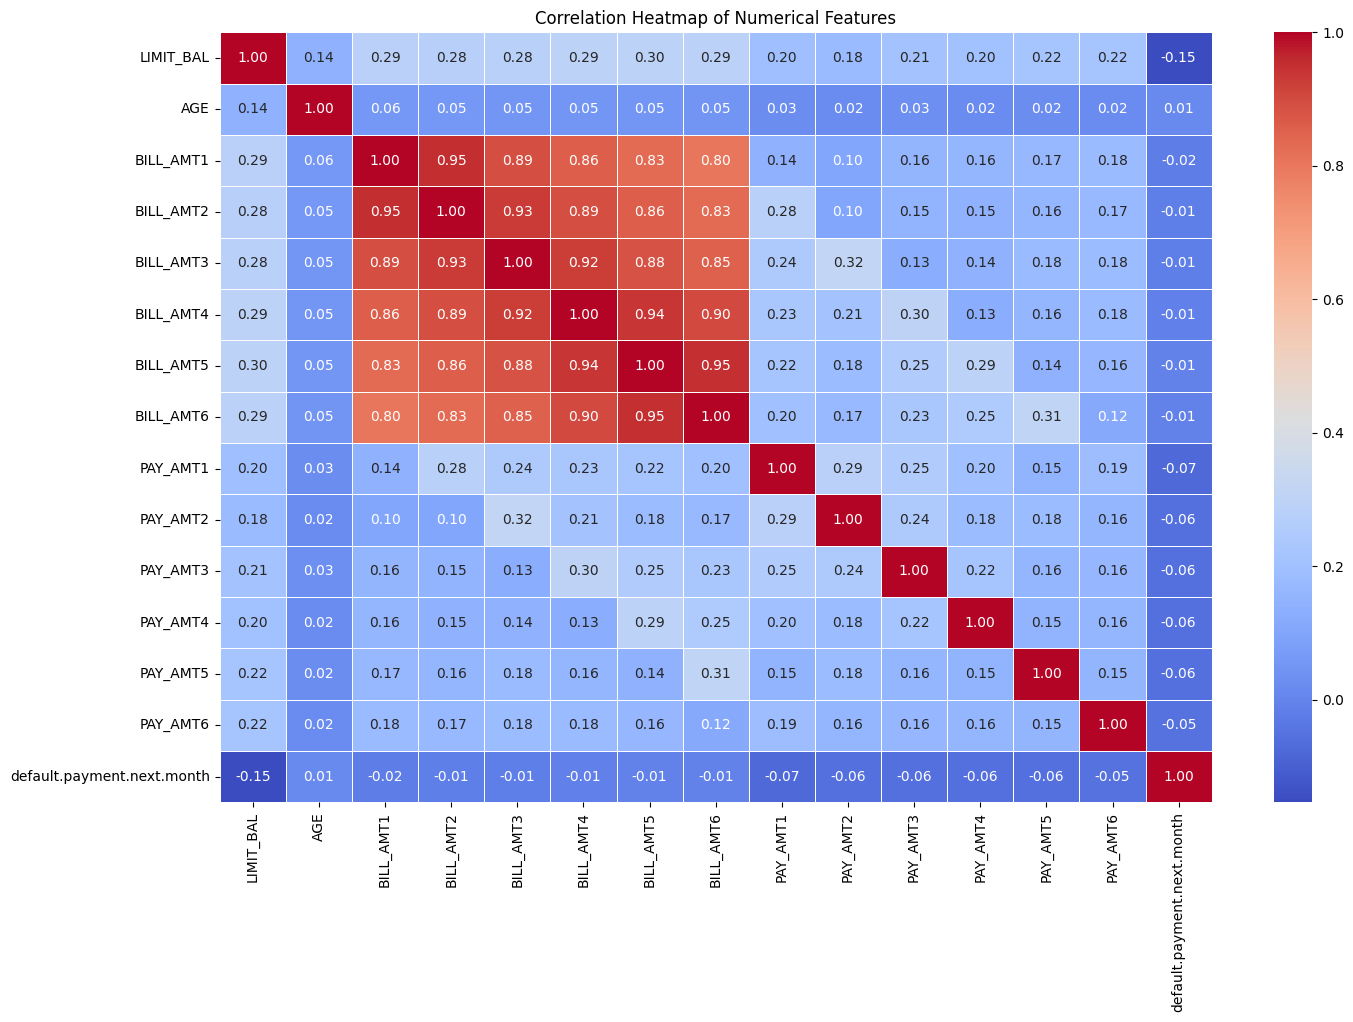

In [417]:
# Heatmap for numerical variables
numerical_features = ['LIMIT_BAL', 'AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                      'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                      'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                      'PAY_AMT6', 'default.payment.next.month']

plt.figure(figsize=(16, 10))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

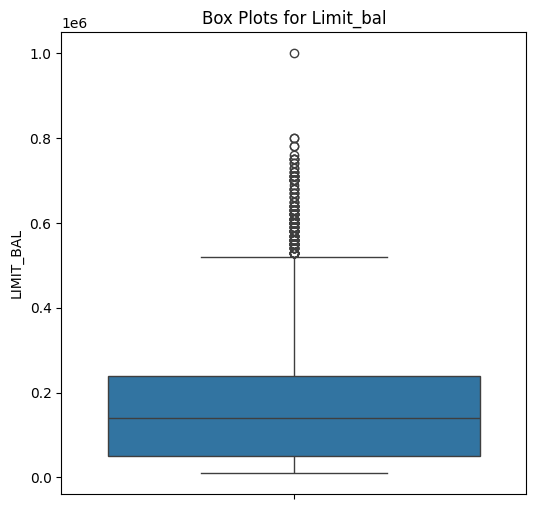

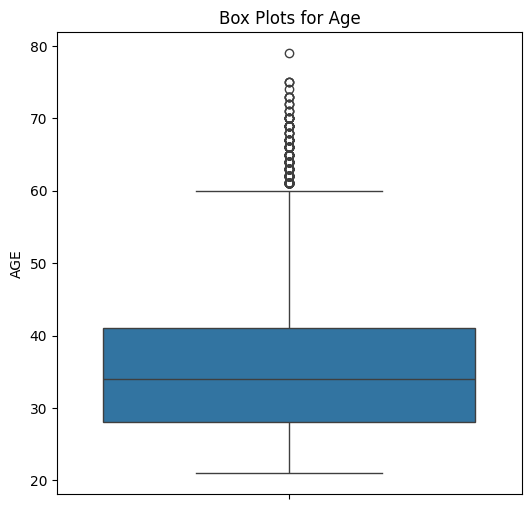

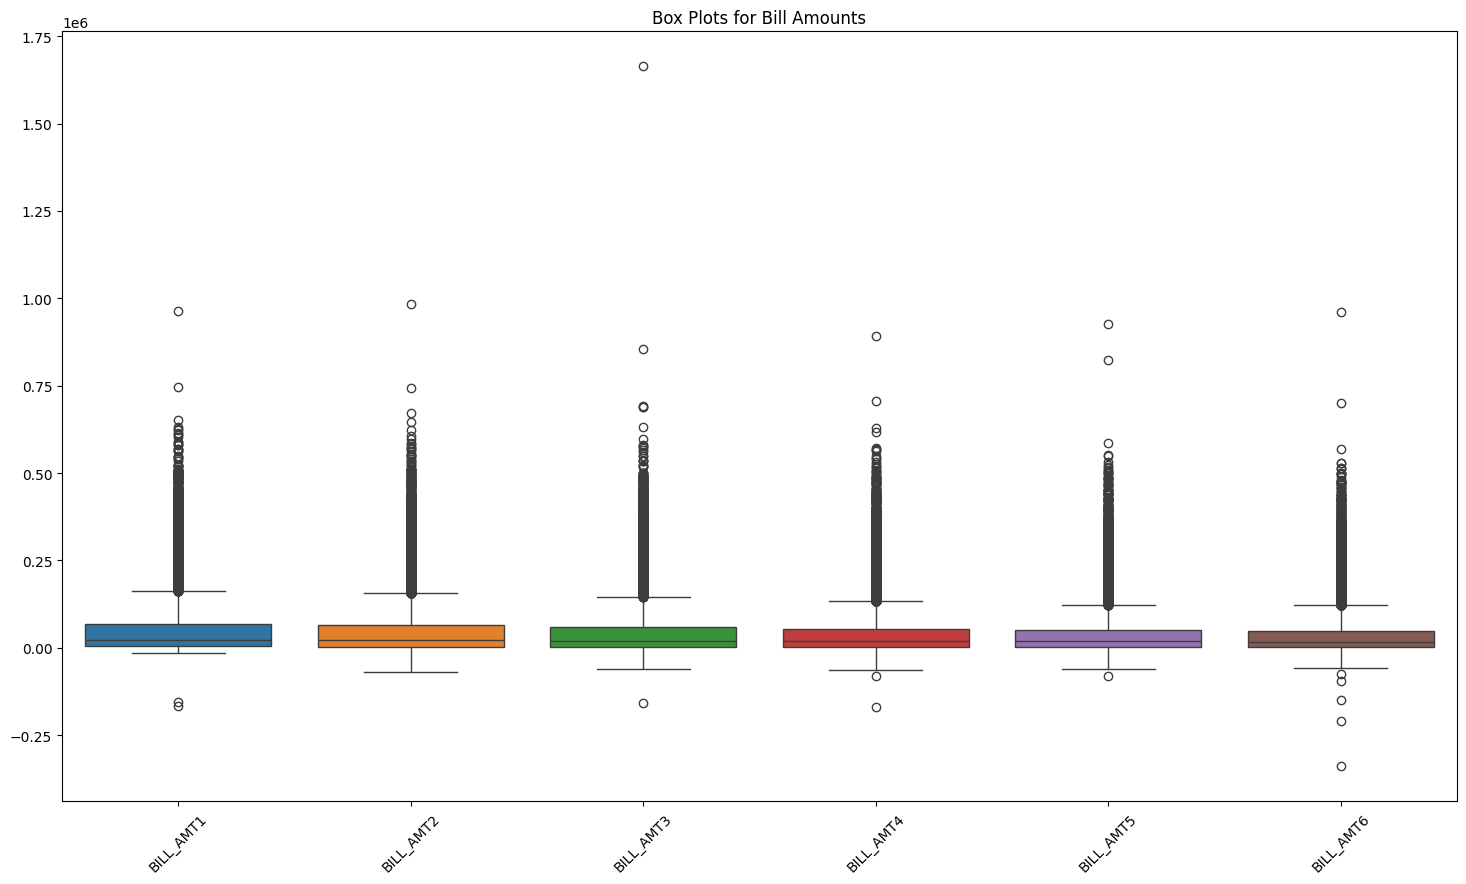

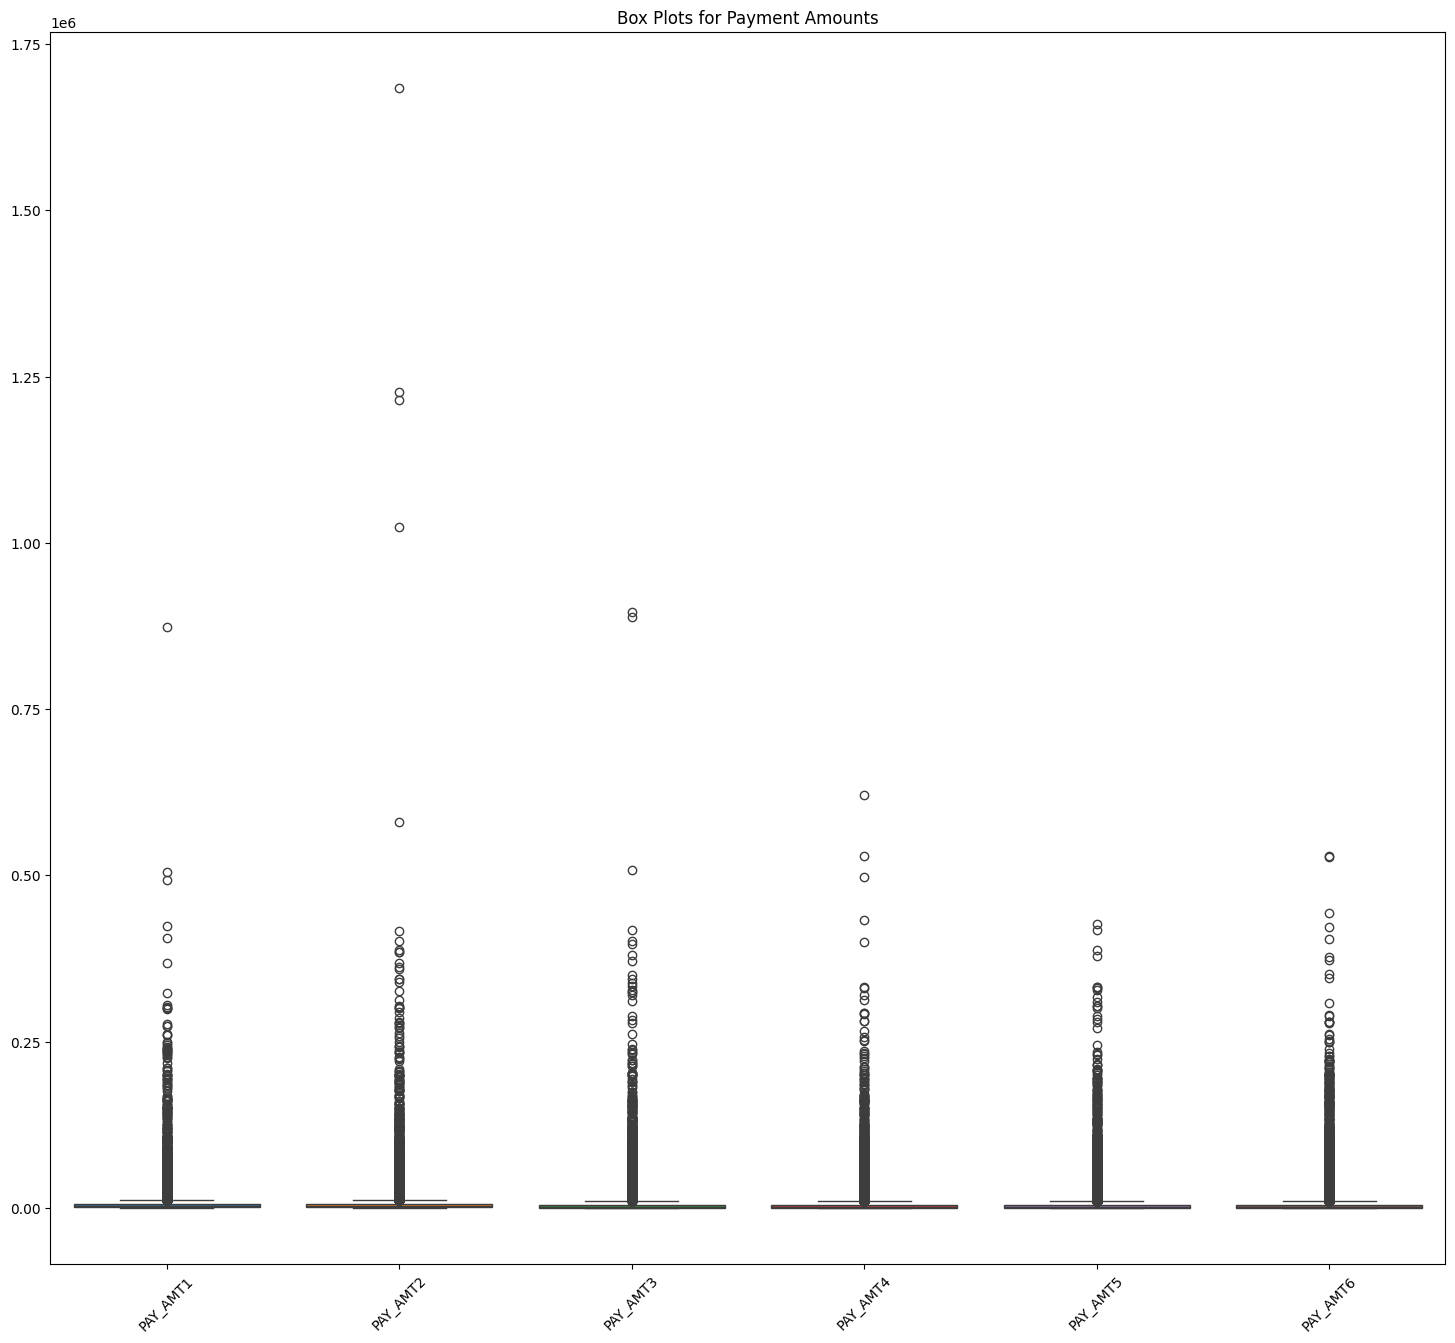

In [418]:
num_cols = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Plot box plots for Limit
plt.figure(figsize=(6, 6))
sns.boxplot(data=data[num_cols[0]])
plt.title('Box Plots for Limit_bal')
plt.xticks(rotation=45)
plt.show()

# Plot box plots for  Age
plt.figure(figsize=(6, 6))
sns.boxplot(data=data[num_cols[1]])
plt.title('Box Plots for Age')
plt.xticks(rotation=45)
plt.show()


# Plot box plots for Bill Amounts
plt.figure(figsize=(18, 10))
sns.boxplot(data=data[num_cols[2:8]]) # Just Bill_AMTs
plt.title('Box Plots for Bill Amounts')
plt.xticks(rotation=45)
plt.show()

# Plot box plots for Pay Amounts
plt.figure(figsize=(18, 16))
sns.boxplot(data=data[num_cols[8:]]) # Just PAY_AMTs
plt.title('Box Plots for Payment Amounts')
plt.xticks(rotation=45)
plt.show()

In [419]:
# Check for correlation
corr = data.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = [c for c in upper.columns if any(upper[c] > 0.95)]
print(high_corr)

['BILL_AMT2']


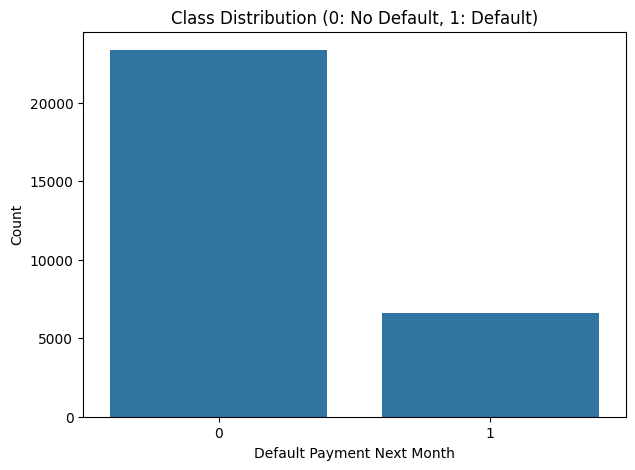

Class 0 (No Default): 23364: (77.88%)
Class 1 (Default): 6636: (22.12%)


In [420]:
# Check for class imbalance
plt.figure(figsize=(7,5))
sns.countplot(x='default.payment.next.month', data=data)
plt.title('Class Distribution (0: No Default, 1: Default)')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.show()

default_counts = data['default.payment.next.month'].value_counts()
print(f"Class 0 (No Default): {default_counts[0]}: ({default_counts[0]/len(data)*100:.2f}%)")
print(f"Class 1 (Default): {default_counts[1]}: ({default_counts[1]/len(data)*100:.2f}%)")

#Data Preprocessing


In [421]:
# check if any missing information is present in a csv file.

#Number of rows before
print(f"Number of Rows before cleaning: {data.shape[0]}")

#Clean data
data = data.dropna()

#Check number of rows after:

print(f"Number of Rows after cleaning: {data.shape[0]}")

# should we also remove 0 values for certain attributes?
# Looking at the scatter plots, it looks like some values of 0 make analysis
# harder.

Number of Rows before cleaning: 30000
Number of Rows after cleaning: 30000


There are no values in the dataset that are missing in the form of NA

In [422]:
# Drop duplicates
#Number of rows before
print(f"Number of rows before removing duplicates: {data.shape[0]}")

duplicate_count = data.duplicated().sum()

print(f"Number of duplicates: {duplicate_count}")

if(duplicate_count == 0):
  print("no duplicates")

else:
  data = data.drop_duplicates()
  print(f"Number of rows after removing duplicates: {data.shape[0]}")


Number of rows before removing duplicates: 30000
Number of duplicates: 0
no duplicates


We have dropped data rows that do not make sense (Example: Marriage that is listed as 1 = married, 2 = single, 3 = others, but some rows had 0. We were unsure what this meant so the rows that had it were droppped.)

In [423]:
#Drop odd values in categorical values
print(f"Number of rows before removing odd rows: {data.shape[0]}")

data = data[data['MARRIAGE'].isin([1,2,3])]
data = data[data['EDUCATION'].isin([1,2,3,4,5,6])]
data = data[data['SEX'].isin([1,2])]

pay_list = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for pay in pay_list:
  # -2 is assumed to be no credit to pay
  # -1 is credit paid fully
  # 0 is assumed to be payment made on time (minimum satement)
  data = data[data[pay].isin(range(-2,10))]


print(f"Number of rows after removing odd rows: {data.shape[0]}")

Number of rows before removing odd rows: 30000
Number of rows after removing odd rows: 29932


In [424]:
# one-hot encoding of categorical features
cat_cols = ['MARRIAGE']
data[cat_cols] = data[cat_cols].astype('category')
data = pd.get_dummies(data, columns=cat_cols, dtype=int)


In [425]:
# See new column names
print(data.columns.tolist())

# Compare before/after shape
print("Shape after encoding:", data.shape)

data.head()

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']
Shape after encoding: (29932, 27)


,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,2,2,24,2,2,-1,-1,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0
1,2,120000.0,2,2,26,-1,2,0,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0
2,3,90000.0,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0
3,4,50000.0,2,2,37,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1,0,0
4,5,50000.0,1,2,57,-1,0,-1,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0


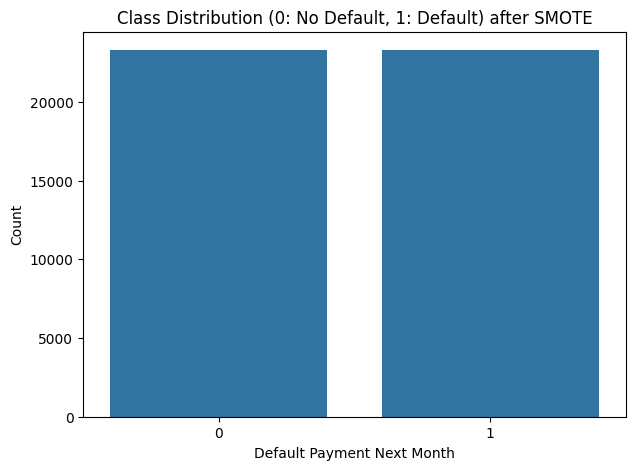

default.payment.next.month
1    23301
0    23301
Name: count, dtype: int64


,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default.payment.next.month
0,1,20000.0,2,2,24,2,2,-1,-1,-2,...,0.0,689.0,0.0,0.0,0.0,0.0,1,0,0,1
1,2,120000.0,2,2,26,-1,2,0,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0,1,0,1
2,3,90000.0,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1,0,0
3,4,50000.0,2,2,37,0,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1,0,0,0
4,5,50000.0,1,2,57,-1,0,-1,0,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1,0,0,0


In [426]:
# Data augmentation generating synthetic samples
# use SMOTE to solve class imbalance problem
x = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']
smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(x,y)
plt.figure(figsize=(7,5))
sns.countplot(x=y)
plt.title('Class Distribution (0: No Default, 1: Default) after SMOTE')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.show()
print(y.value_counts())
data = pd.concat([x, y], axis=1)
data.head()

In [427]:
# Normalization/Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['LIMIT_BAL','AGE'] + [f'BILL_AMT{i}' for i in range(1,7)] + [f'PAY_AMT{i}' for i in range(1,7)]
data[num_cols].describe().T[['mean', 'std']]


,mean,std
LIMIT_BAL,154128.512553,125987.962178
AGE,35.416356,8.811815
BILL_AMT1,50058.836103,73222.865449
BILL_AMT2,48414.733343,71077.915103
BILL_AMT3,46309.985054,68897.477983
BILL_AMT4,42755.629387,64182.562951
BILL_AMT5,40030.922340,60927.707734
BILL_AMT6,38757.390364,59590.615126
PAY_AMT1,4734.246726,14040.228596
PAY_AMT2,4888.533888,19195.982646


In [428]:
data[num_cols] = scaler.fit_transform(data[num_cols])
data[num_cols].describe().T[['mean', 'std']]

,mean,std
LIMIT_BAL,4.879054e-18,1.000011
AGE,4.879054e-17,1.000011
BILL_AMT1,6.525735e-17,1.000011
BILL_AMT2,5.305971e-17,1.000011
BILL_AMT3,-1.006305e-16,1.000011
BILL_AMT4,-8.141921e-17,1.000011
BILL_AMT5,-2.683480e-17,1.000011
BILL_AMT6,1.036799e-17,1.000011
PAY_AMT1,2.927432e-17,1.000011
PAY_AMT2,1.463716e-17,1.000011


##Redo the visualization after data preprocessing using the synthetic sample.

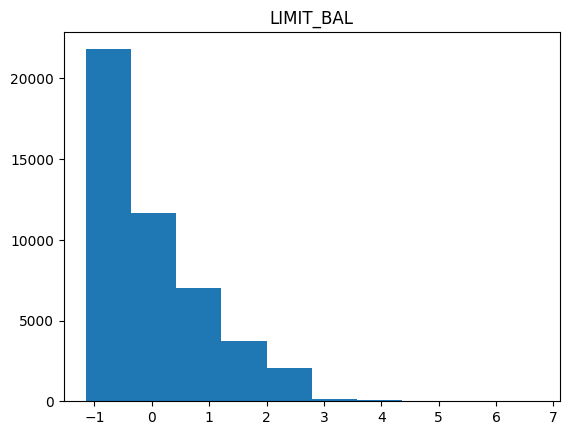

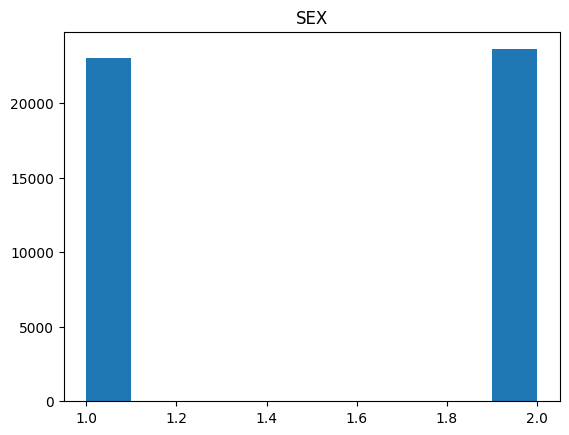

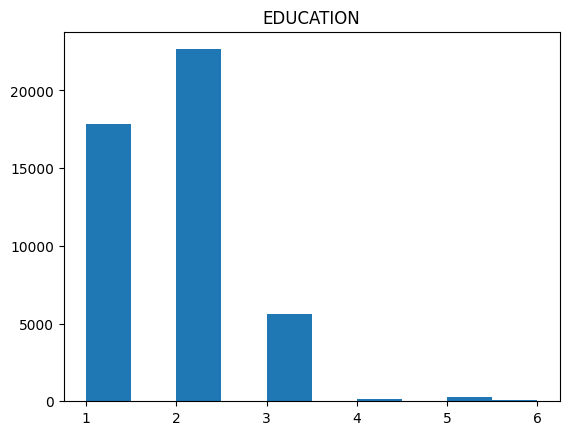

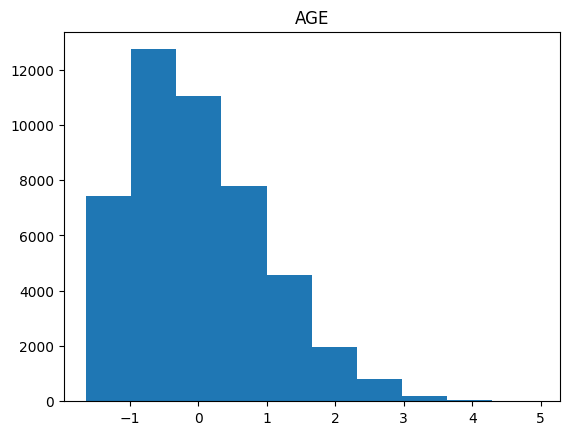

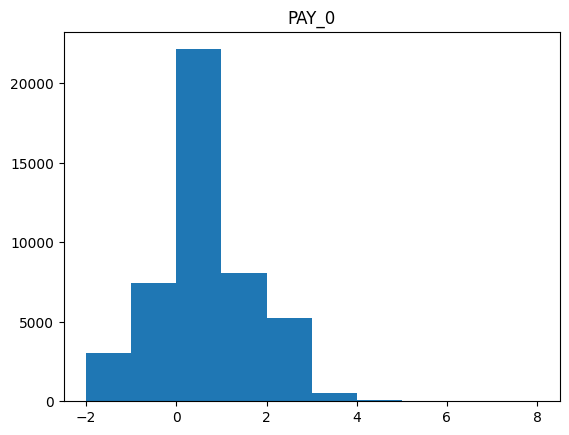

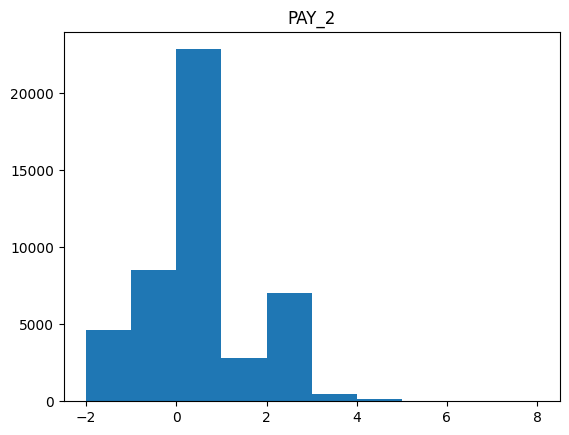

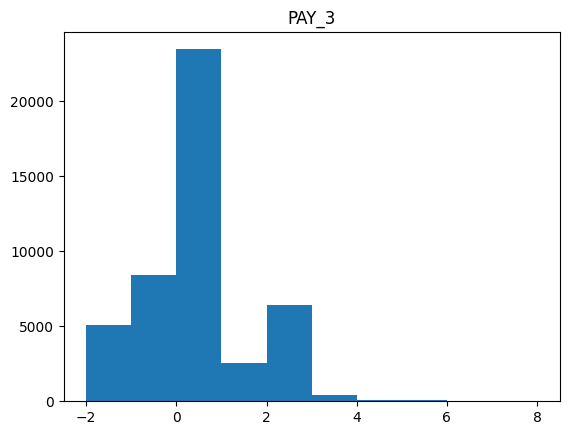

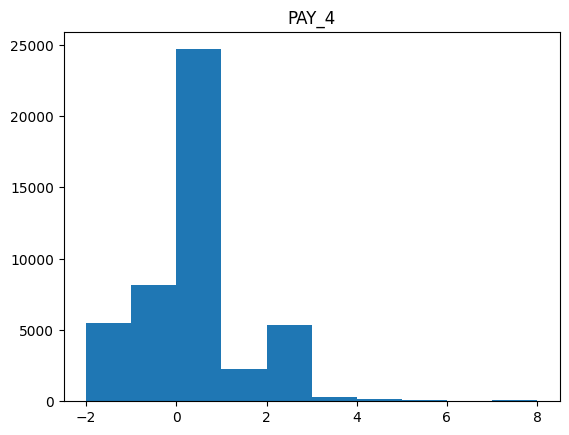

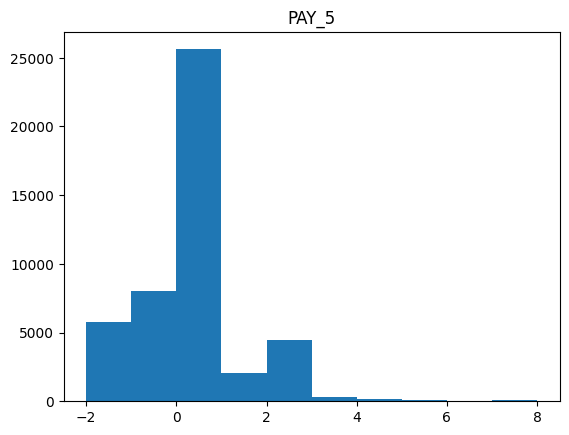

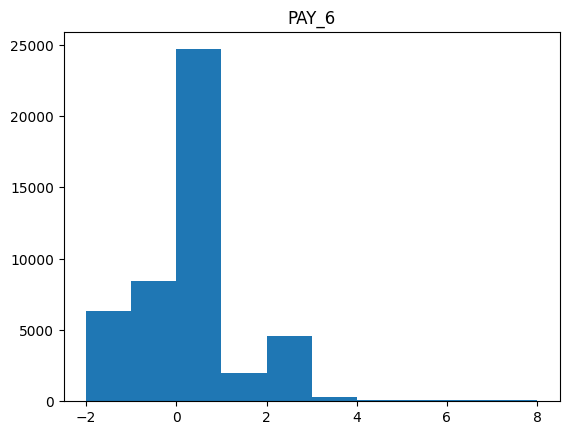

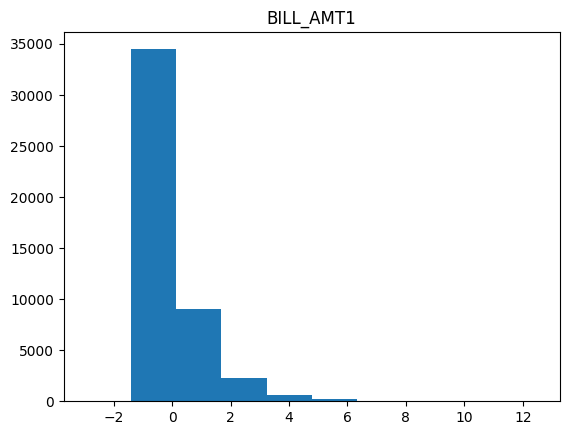

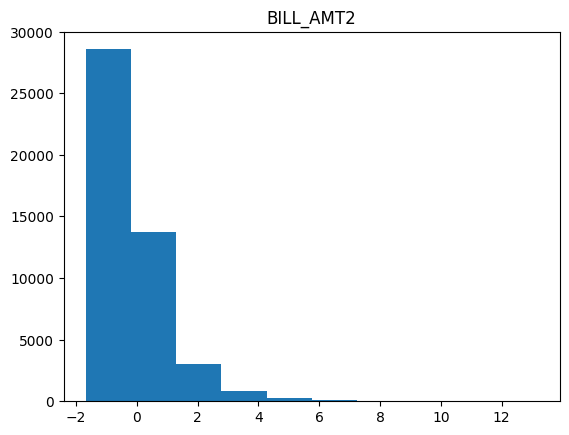

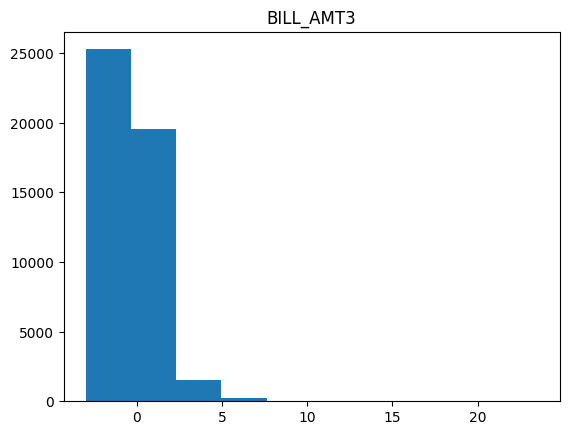

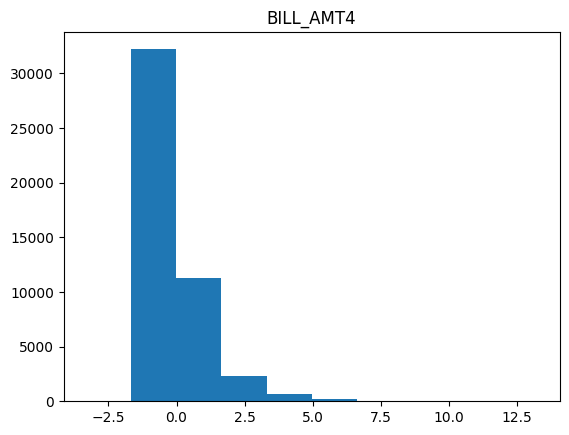

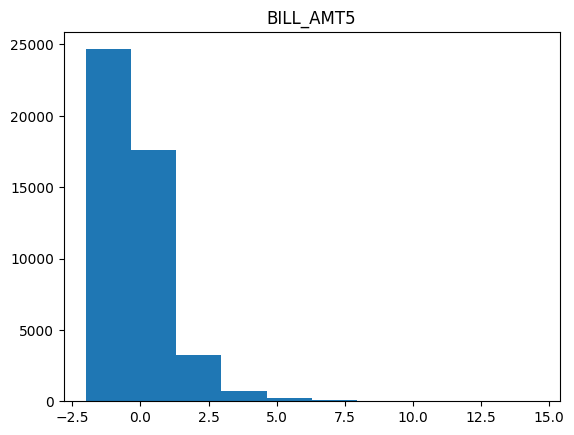

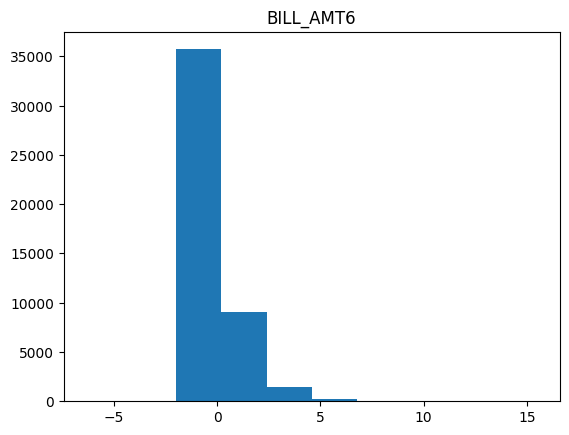

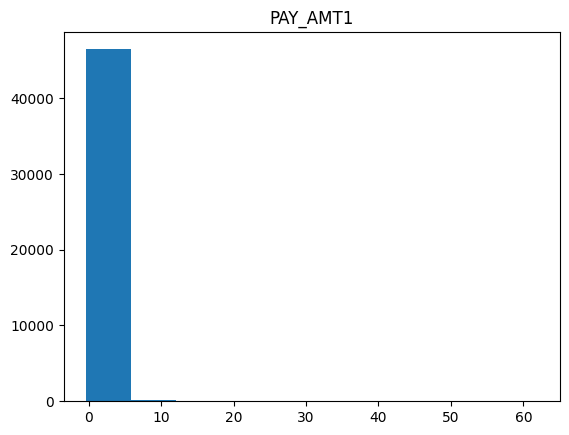

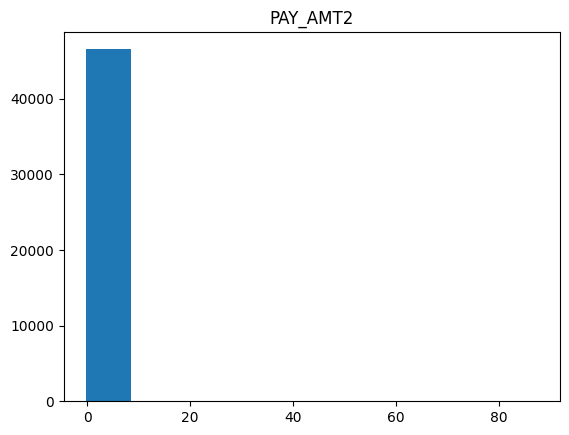

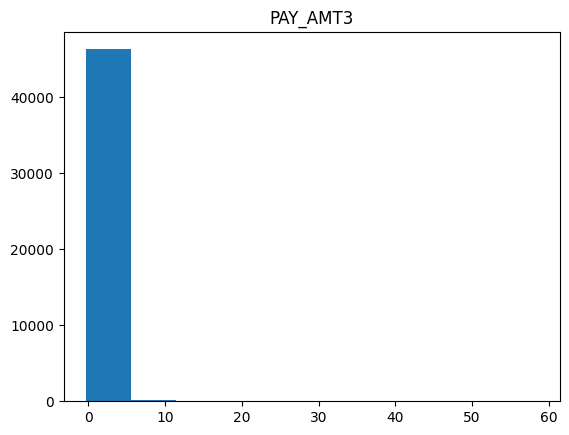

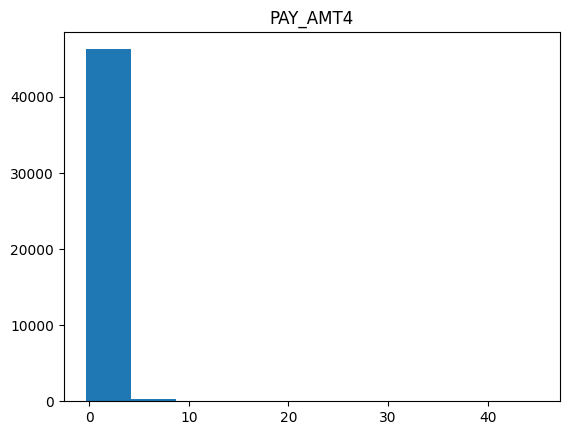

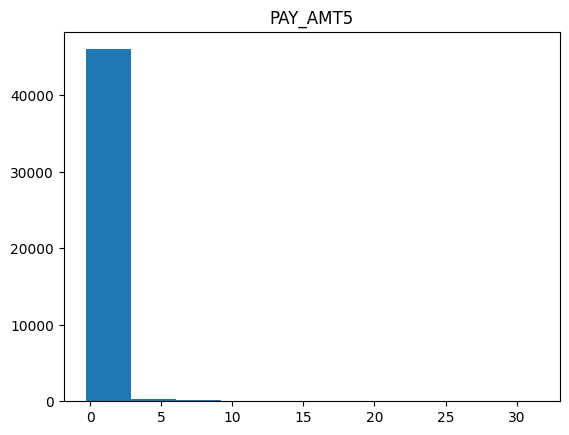

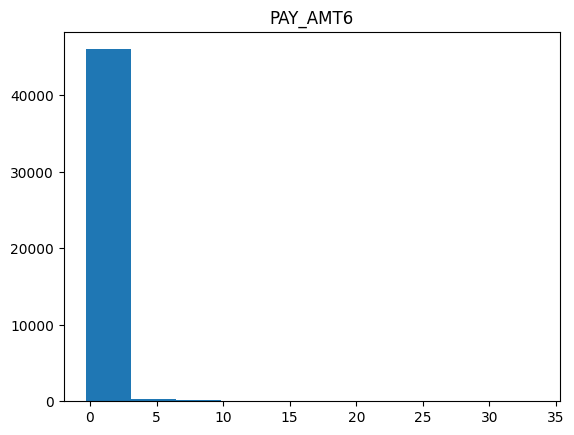

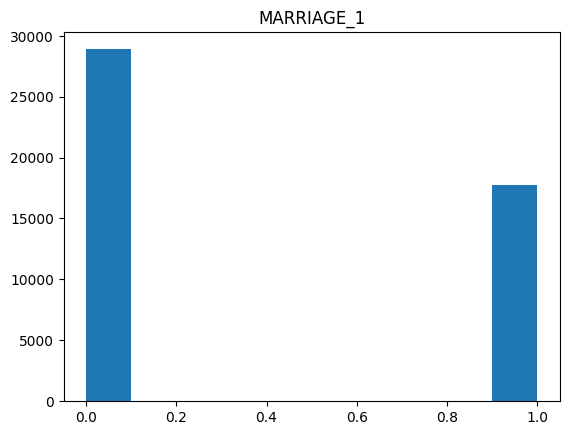

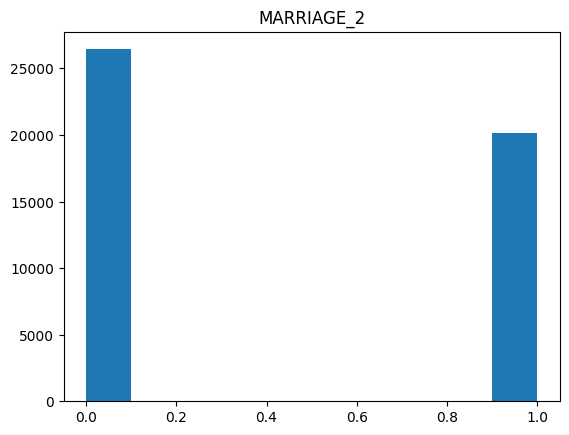

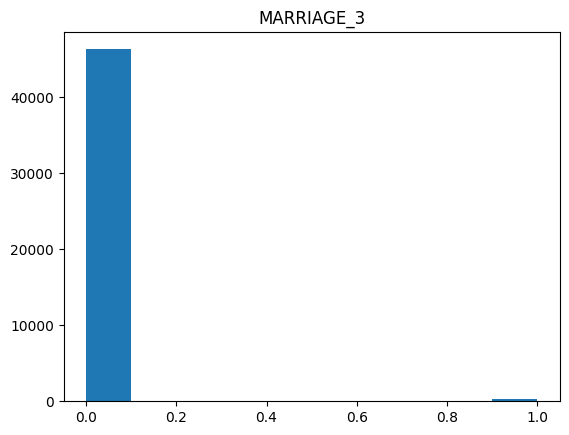

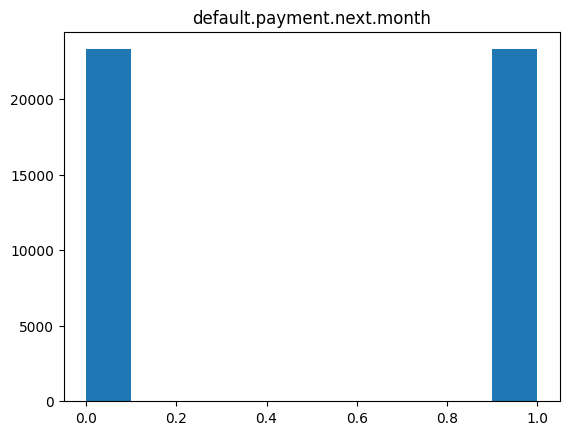

In [429]:
for attribute in data.columns:
  if (attribute == 'ID'):
    continue
  plt.figure()
  plt.hist(data[attribute])
  plt.title(attribute)
  plt.show()

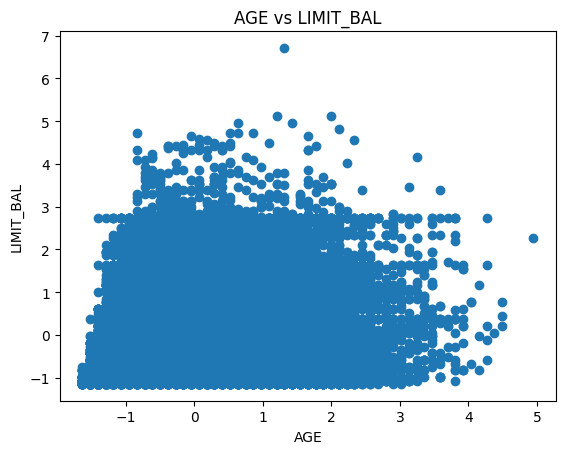

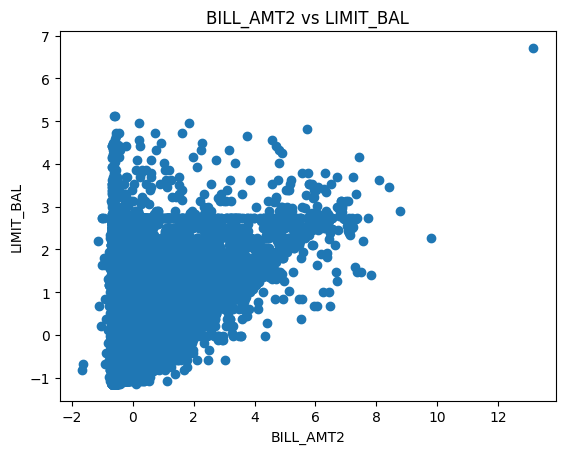

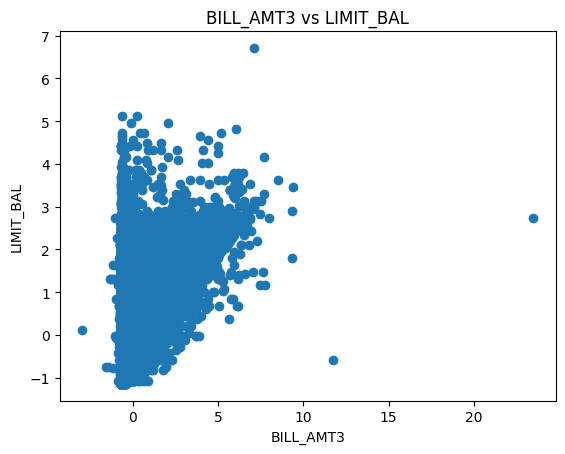

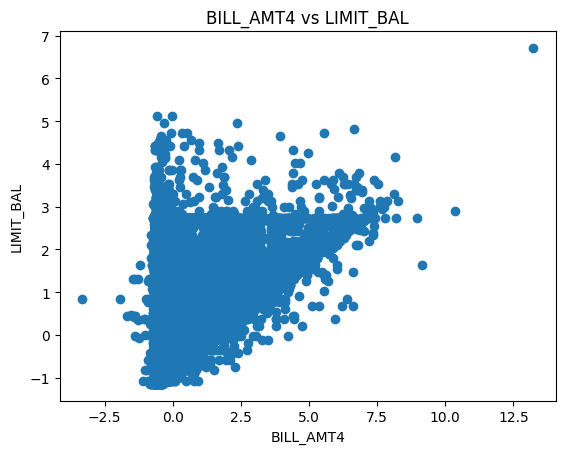

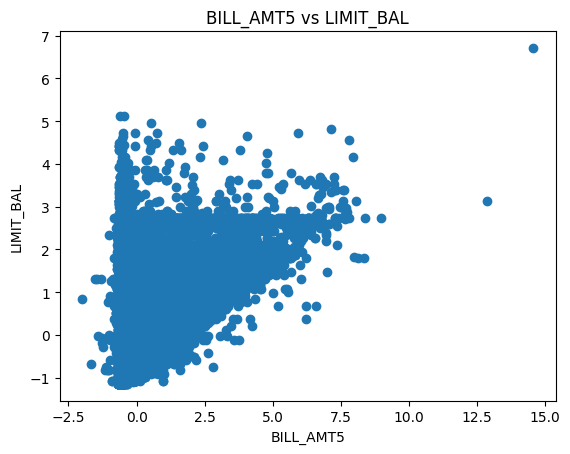

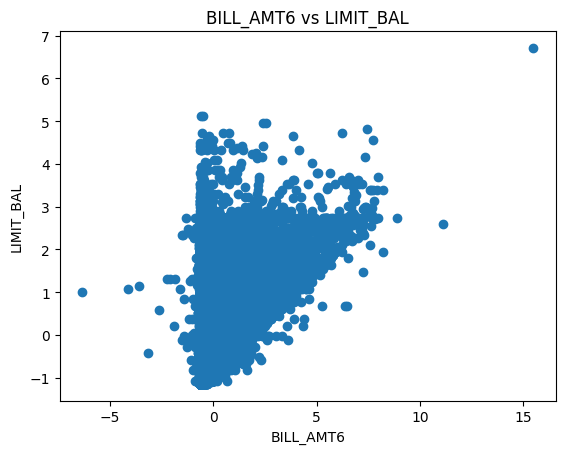

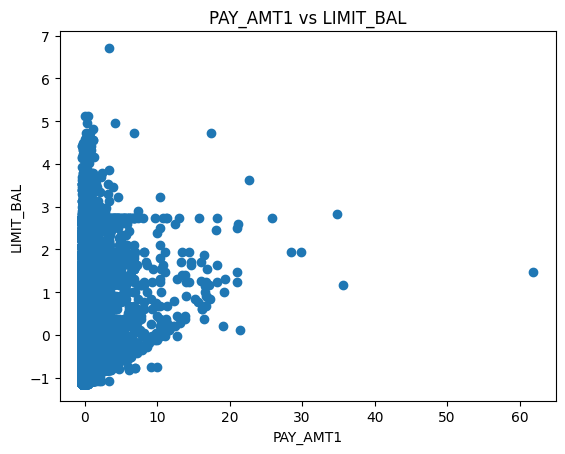

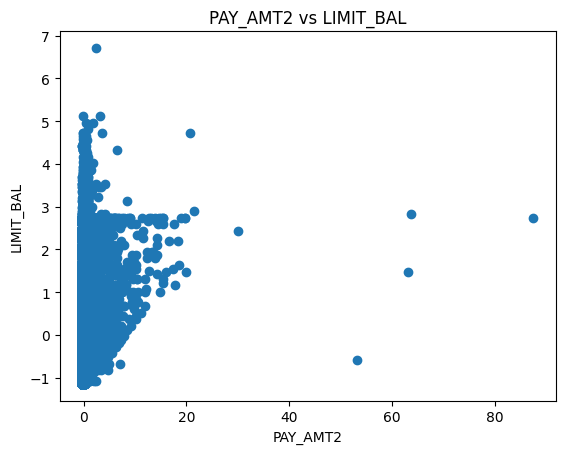

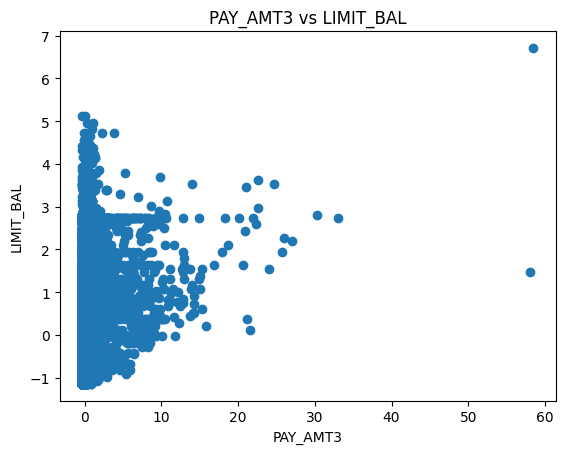

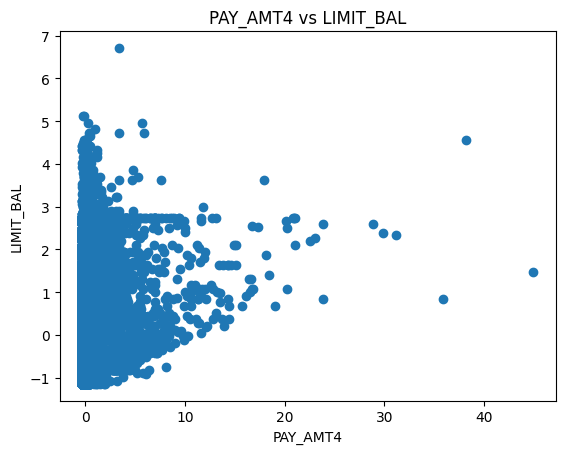

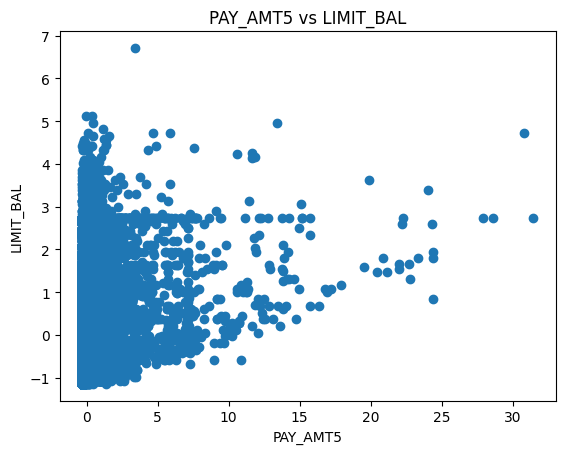

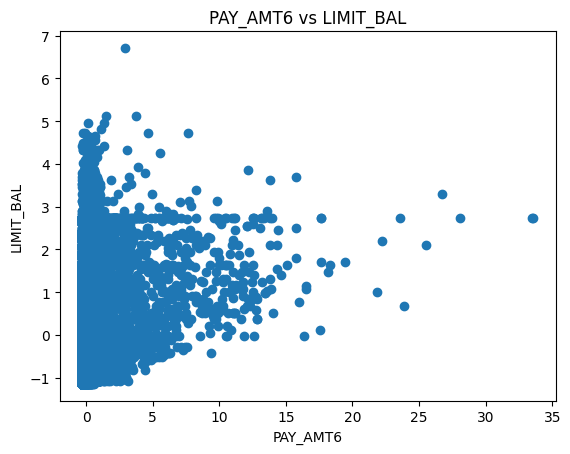

In [430]:
# skip the categorical/ordinal variables
plt.figure()
plt.scatter(data['AGE'], data['LIMIT_BAL'])
plt.title('AGE vs LIMIT_BAL')
plt.xlabel('AGE')
plt.ylabel('LIMIT_BAL')
plt.show()
for i in range(12, len(data.columns)-4):
  plt.figure()
  plt.scatter(data[data.columns[i]], data['LIMIT_BAL'])
  plt.title(data.columns[i] + ' vs LIMIT_BAL')
  plt.xlabel(data.columns[i])
  plt.ylabel('LIMIT_BAL')
  plt.show()

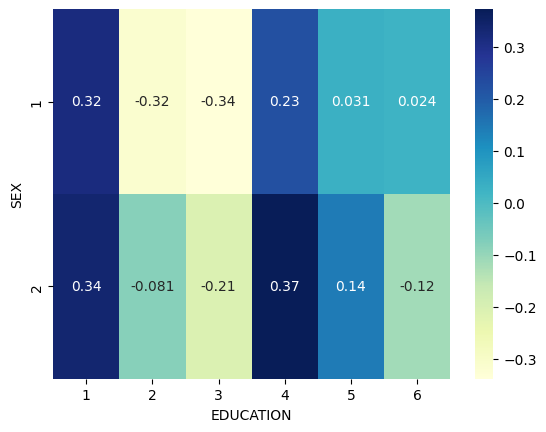

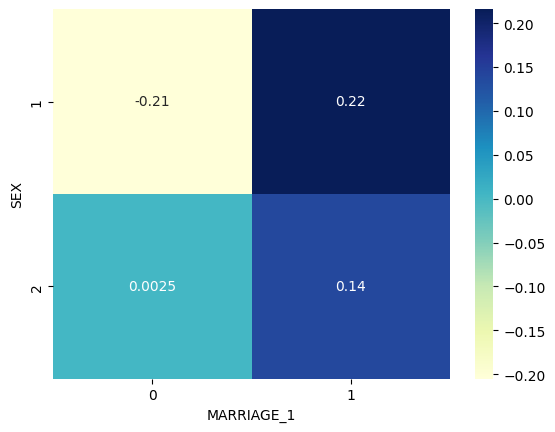

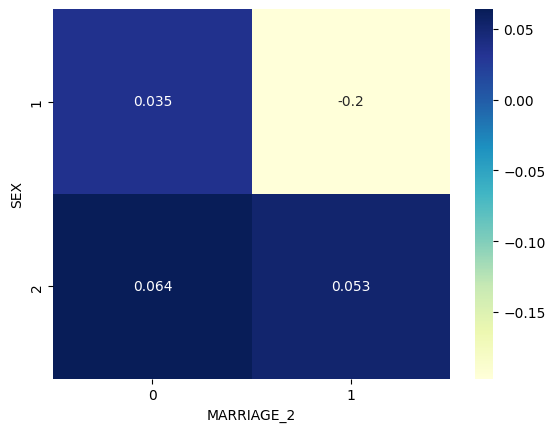

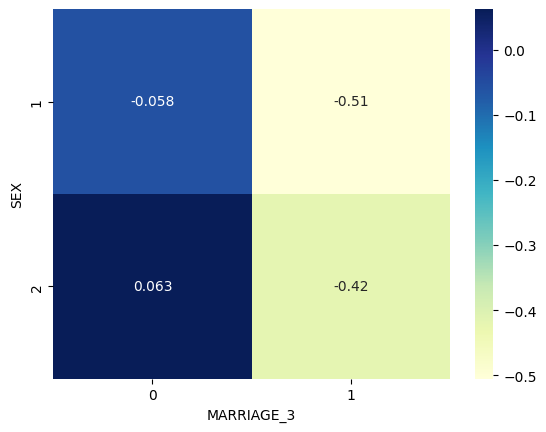

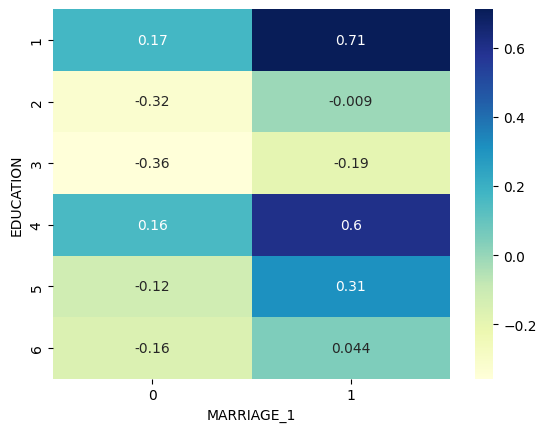

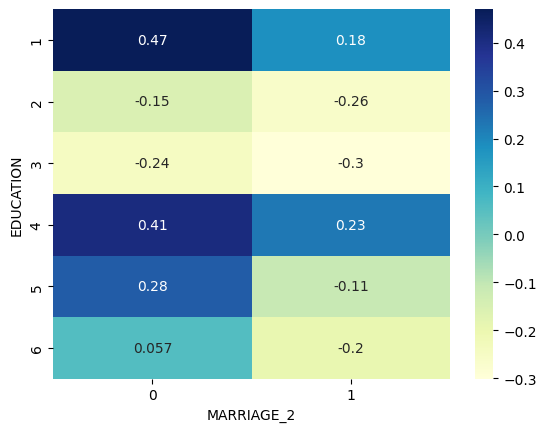

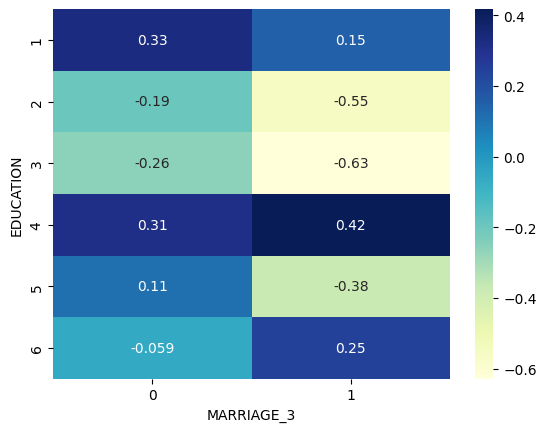

In [431]:
column_names = ['SEX', 'EDUCATION', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']
for i in range(2):
  for j in range(i+1, 5):
    heatmap_data = data.pivot_table(index=data[column_names[i]], columns=data[column_names[j]], values="LIMIT_BAL", aggfunc="mean")
    sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
    plt.show()

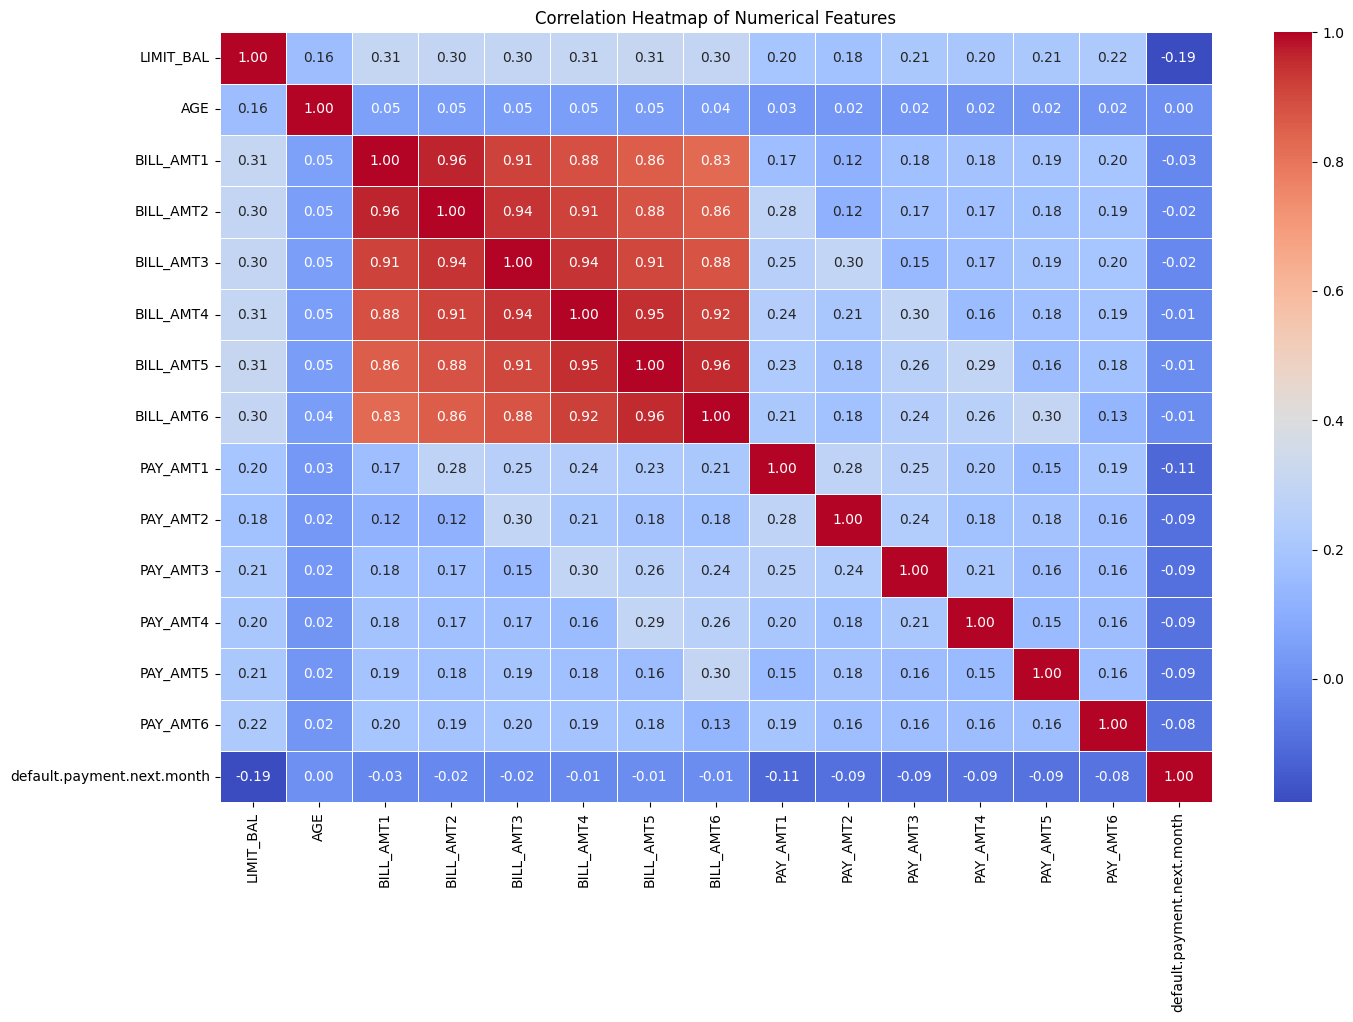

In [432]:
# Heatmap for numerical variables
numerical_features = ['LIMIT_BAL', 'AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                      'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                      'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                      'PAY_AMT6', 'default.payment.next.month']

plt.figure(figsize=(16, 10))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

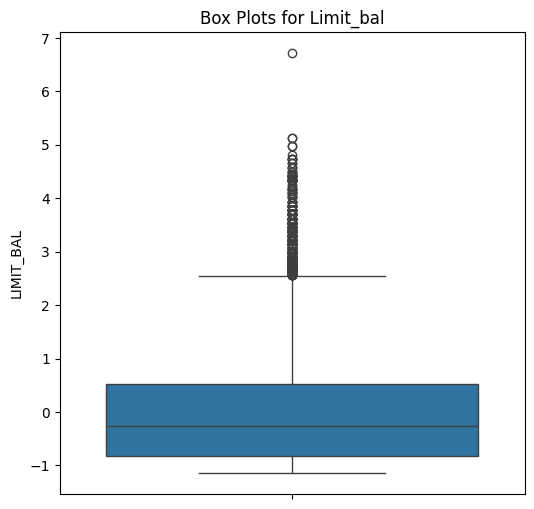

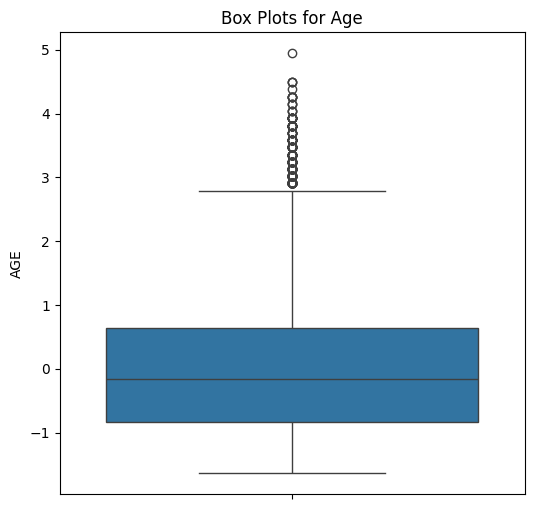

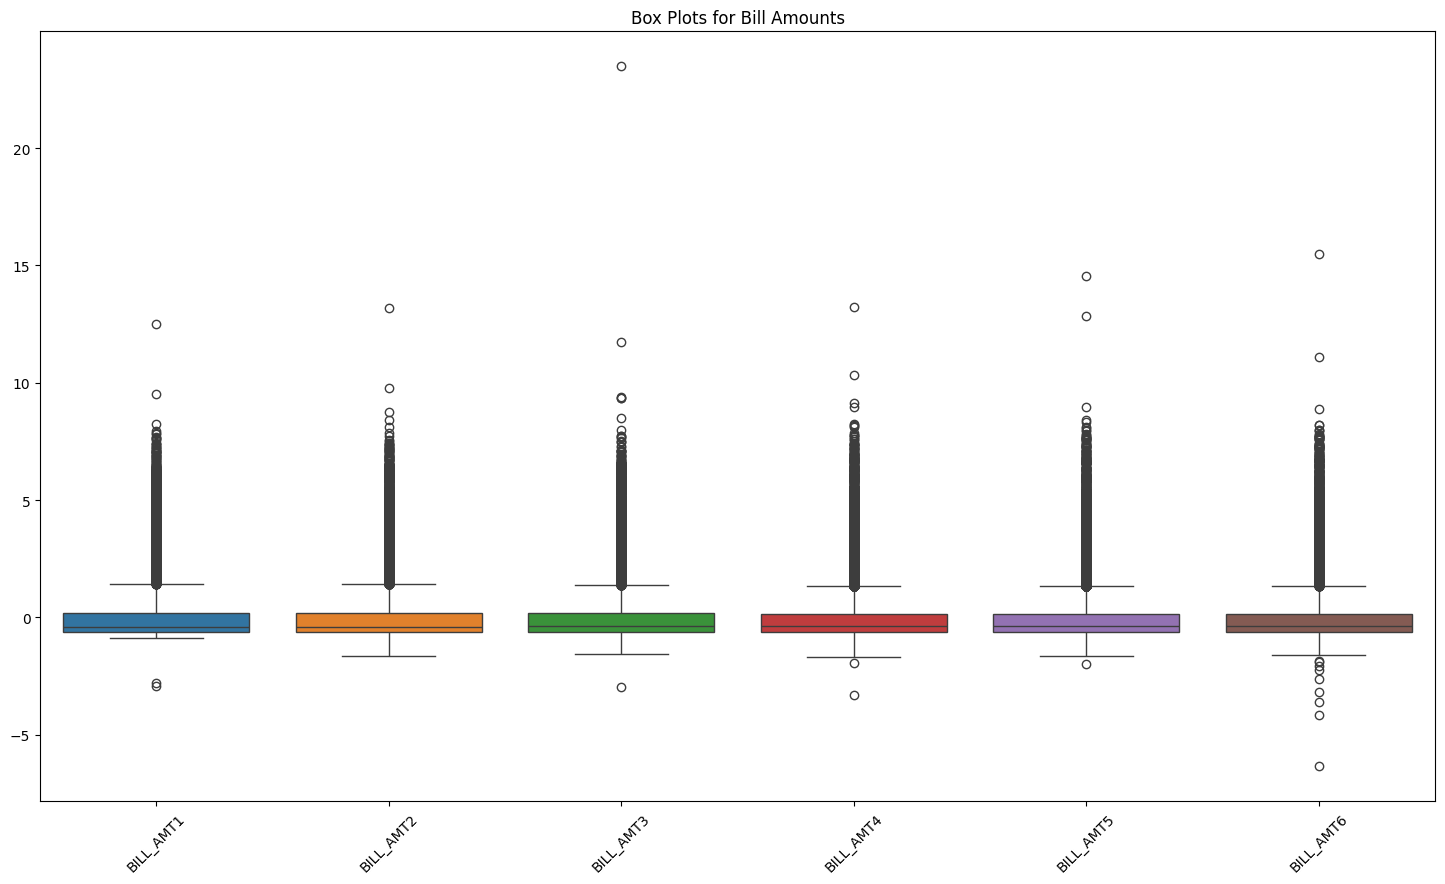

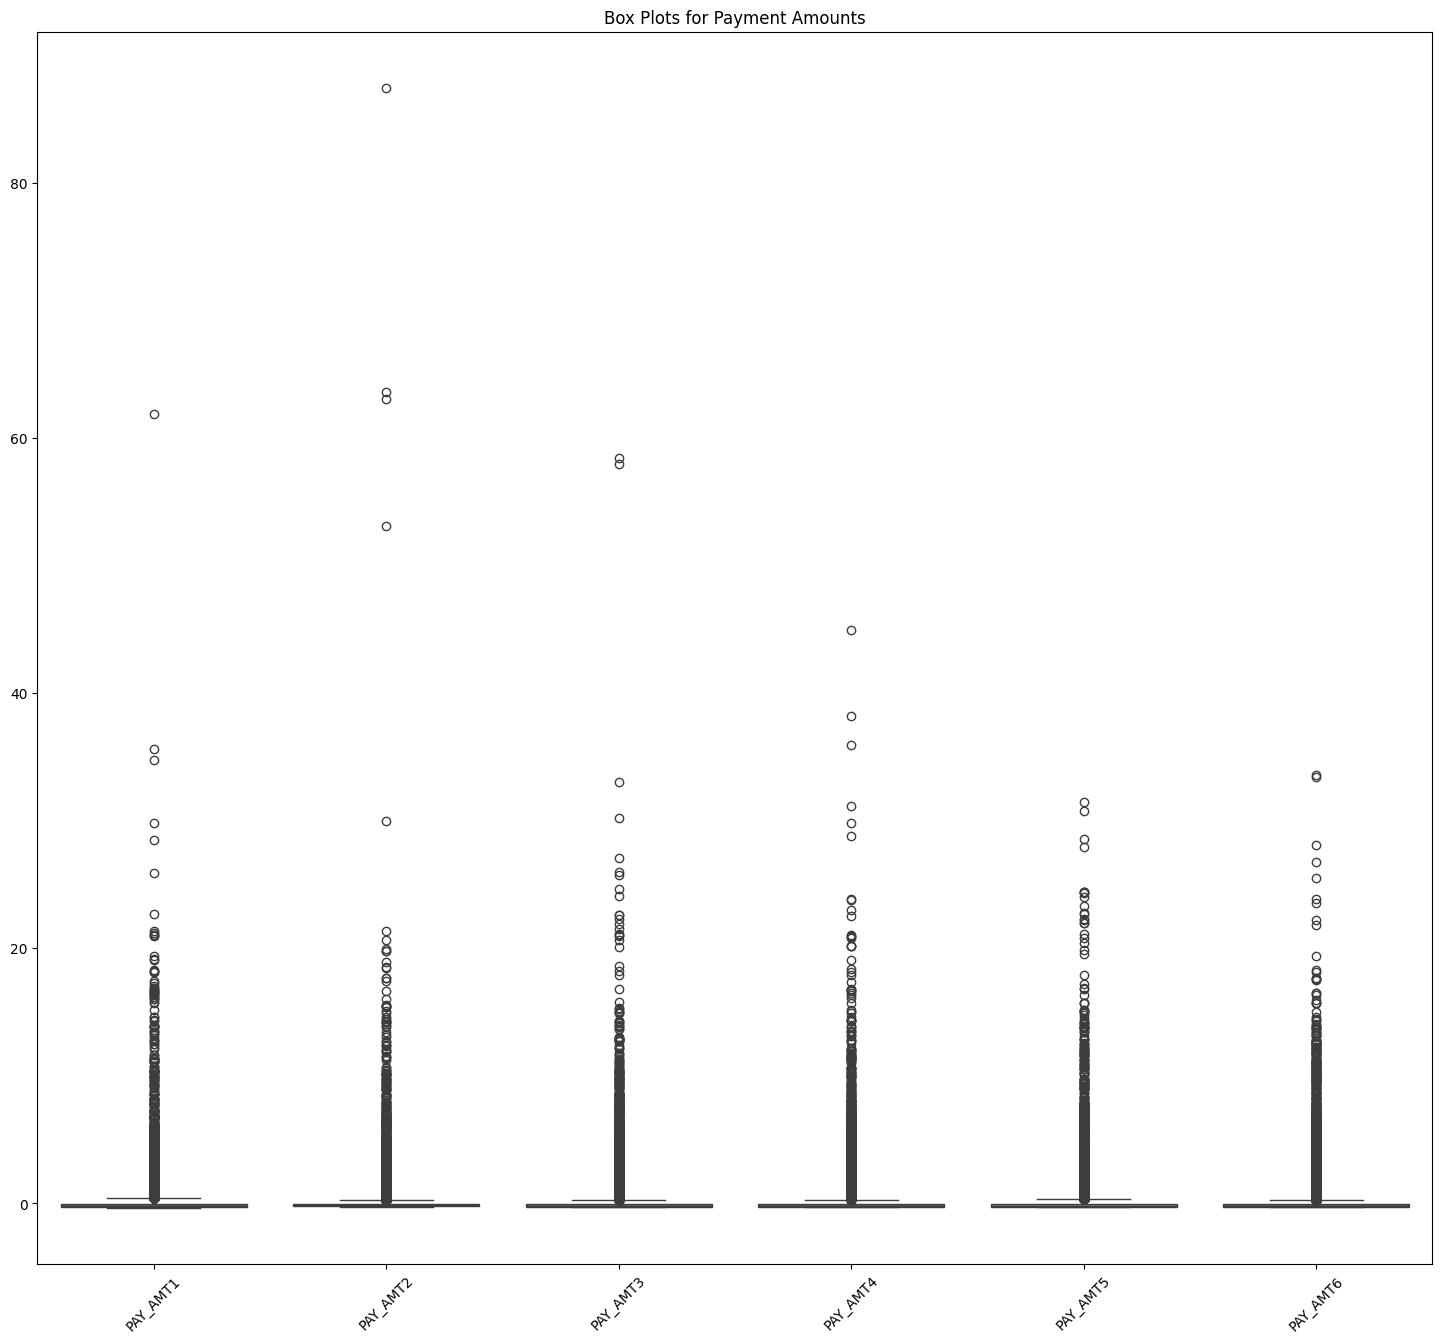

In [433]:
num_cols = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

# Plot box plots for Limit
plt.figure(figsize=(6, 6))
sns.boxplot(data=data[num_cols[0]])
plt.title('Box Plots for Limit_bal')
plt.xticks(rotation=45)
plt.show()

# Plot box plots for  Age
plt.figure(figsize=(6, 6))
sns.boxplot(data=data[num_cols[1]])
plt.title('Box Plots for Age')
plt.xticks(rotation=45)
plt.show()


# Plot box plots for Bill Amounts
plt.figure(figsize=(18, 10))
sns.boxplot(data=data[num_cols[2:8]]) # Just Bill_AMTs
plt.title('Box Plots for Bill Amounts')
plt.xticks(rotation=45)
plt.show()

# Plot box plots for Pay Amounts
plt.figure(figsize=(18, 16))
sns.boxplot(data=data[num_cols[8:]]) # Just PAY_AMTs
plt.title('Box Plots for Payment Amounts')
plt.xticks(rotation=45)
plt.show()

In [434]:
# Check for correlation
corr = data.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = [c for c in upper.columns if any(upper[c] > 0.95)]
print(high_corr)

['BILL_AMT2', 'BILL_AMT5', 'BILL_AMT6']


#Discussion of dataset:

The `LIMIT_BAL`, `AGE`, and all six `PAY` histograms show right-skewed data. The `PAY_AMT` data is extremely right-skewed, with a few outliers that are greatly larger than the other data. The scatter plots show that there exists some correlation between the attributes but there are some outliers in the graphs. The heatmap for numerical features shows high correlations among the BILL_AMT features (BILL_AMT1 through BILL_AMT6). This is logical, since a person's bill amount from one month should be a strong predictor of the next. Another potential problem is that the class distribution is highly skewed. There are way more rows with class 0 (23,301 rows) than class 1 (6,631 rows). Specifically, Class 0 comprises 77.85% of the data, while Class 1 comprises only 22.15%. We solved this imbalance by using SMOTE.
